# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data  
## Part 4: Working with geospatial data and mapping

Mark Bauer

Table of Contents
=================

   * 1. Importing Libraries
       
       
   * 2. Reading and Writing Files
       * 2.1 Reading Spatial Data
       * 2.2 Writing Spatial Data
       
       
   * 3. Data Structures
       * 3.1 GeoSeries
       * 3.2 GeoDataFrame 
   
   
   * 4. Attributes and Methods
       * 4.1 Basic Attributes
       * 4.2 Basic Methods
       * 4.3 Create Centroids from Polygons
       * 4.4 Creating a GeoDataFrame from a DataFrame with Coordinates
       

   * 5. Making Maps
       * 5.1 Points
       * 5.2 Lines
       * 5.3 Polygons
       * 5.4 Maps with Layers
       * 5.5 Adding Background Map
       * 5.6 Clip Data
       
       
   * 6. Joining Data
       * 6.1 Attribute Join
       * 6.2 Spatial Join
       
       
   * 7. Indexing and Selecting Data
   
       
   * 8. Coordinate Reference Systems
   
       
   * 9. Types of Maps
       * 9.1 Choropleth Maps
       * 9.2 Heat Maps
       * 9.3 Hexbin Map
       * 9.4 Proportional Symbol Map
       * 9.5 Graduated Symbol Map
       * 9.6 One-to-One Dot Density Map
       * 9.7 One-to-One Dot Density Map with Joint Grids
       * 9.8 Cartogram Map
       * 9.9 Voroni Map
       * 9.10 Quadtree Map
       * 9.11 Aesthetics for Maps
       

   * 10. Relationship Tests
   
   
   * 11. Set Operations with Overlay
       * 11.1 Union
       * 11.2 Intersection
       * 11.3 Symmetric Difference
       * 11.4 Difference
       * 11.5 Identity
       * 11.6 Aggregation with Dissolve


   * 12. Additional Attributes and Methods
       * 12.1 Unary Predicates
       * 12.2 Binary Predicates
           * 12.2.1 Centroids vs. Representative Points
           * 12.2.2 Intersects
           * 12.2.3 Contains 
           * 12.2.4 Within
           * 12.2.5 Crosses
           * 12.2.6 Overlaps
           * 12.2.7 Touches
           * 12.2.8 Covers
       * 12.4 Constructive Methods
           * 12.4.1 Buffer
           * 12.4.2 Convex Hull
           * 12.4.3 Envelope 
           * 12.4.4 Simplify
       * 12.5 Affine Transformations
           * 12.5.1 Rotate
           * 12.5.2 Scale
           * 12.5.3 Skew 
           * 12.5.4 Translate/Offset
           
       
   * 13. Conclusion

**Goal:** In this notebook, we will review various workflows of working with geospatial data and mapping.

**Main Libraries:** 

[GeoPandas](https://geopandas.org/index.html) is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.

[geoplot](https://residentmario.github.io/geoplot/index.html#) is a high-level Python geospatial plotting library. It’s an extension to cartopy and matplotlib which makes mapping easy: like seaborn for geospatial.

[Matplotlib](https://matplotlib.org/3.1.1/index.html#) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

# Datasets
### Schools  
https://data.cityofnewyork.us/Education/School-Point-Locations/jfju-ynrr

## Streets  
https://data.cityofnewyork.us/City-Government/NYC-Street-Centerline-CSCL-/exjm-f27b

## Streets  
https://data.cityofnewyork.us/City-Government/NYC-Street-Centerline-CSCL-/exjm-f27b

# 1. Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import fiona
from fiona.crs import from_epsg
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.patheffects as pe
from mpl_toolkits.axes_grid1 import make_axes_locatable
import urllib
import json
from io import BytesIO
import requests
from sodapy import Socrata
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import contextily as ctx

Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

In [2]:
%load_ext watermark

In [3]:
%watermark -v -p numpy,pandas,geopandas,geoplot,matplotlib.pyplot

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

numpy            : 1.23.1
pandas           : 1.4.3
geopandas        : 0.11.1
geoplot          : 0.5.1
matplotlib.pyplot: unknown



Documention for installing watermark: https://github.com/rasbt/watermark

# 2. Reading and Writing Files

## 2.1 Reading Spatial Data

In [4]:
# saving neighborhood tabulation areas (nta) file link as 'url'
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'

# Reading in GeoJSON
nta_shape = gpd.read_file(url)

# returning first five rows 
nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
1    Queens         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
2    Queens         4  MULTIPOLYGON (((-73.77758 40.73019, -73.77849 ...  
3    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
4  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...

In [5]:
# saving school points shapefile link as 'zipfile'
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'

# reading in data as 'school_points
school_points = gpd.read_file(zipfile) 

# returning first five rows 
school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE              SCHOOLNAME  \
0  15K001          K      2.0     K001     P.S. 001 THE BERGEN   
1  17K002          K      2.0     K002                M.S. 002   
2  21K095          K      2.0     K095  P.S. 095 THE GRAVESEND   
3  21K096          K      2.0     K096       I.S. 096 SETH LOW   
4  21K097          K      2.0     K097    P.S. 97 THE HIGHLAWN   

                          SCH_TYPE  MANAGED_BY  GEO_DISTRI  ADMIN_DIST  \
0                       Elementary           1          15          15   
1  Junior High-Intermediate-Middle           1          17          17   
2                              K-8           1          21          21   
3  Junior High-Intermediate-Middle           1          21          21   
4                       Elementary           1          21          21   

                  ADDRESS STATE_CODE    ZIP               PRINCIPAL  \
0           309 47 STREET         NY  11220        Jennifer Eusanio   
1     655 PARKSIDE AVENUE         NY  11226        ADRIENNE SPENCER   
2  345 VAN SICKLEN STREET         NY  11223           Janet Ndzibah   
3             99 AVENUE P         NY  11204  Denise Sandra Levinsky   
4   1855 STILLWELL AVENUE         NY  11223       KRISTINE MUSTILLO   

        PRIN_PH           FAX                            GRADES      City  \
0  718-567-7661  718-567-9771           PK,0K,01,02,03,04,05,SE  BROOKLYN   
1  718-462-6992  718-284-7717                       06,07,08,SE  BROOKLYN   
2  718-449-5050  718-449-3047  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN   
3  718-236-1344  718-236-2397                       06,07,08,SE  BROOKLYN   
4  718-372-7393  718-372-3842           PK,0K,01,02,03,04,05,SE  BROOKLYN   

                        geometry  
0  POINT (980985.054 175780.759)  
1  POINT (997785.136 178431.911)  
2  POINT (991224.983 156323.361)  
3  POINT (988439.681 160709.993)  
4  POINT (988205.073 158329.591)

In [6]:
# listing files in our data folder
%ls data/

README.md                output.dbf               sample-data.geojson
building-footprints.csv  output.json              sample-data.gpkg
nta_shape.cpg            output.prj               sample-data.json
nta_shape.dbf            output.shp               sample-data.prj
nta_shape.geojson        output.shx               sample-data.shp
nta_shape.prj            output.xlsx              sample-data.shx
nta_shape.shp            sample-buildings.zip     sample-data.xlsx
nta_shape.shx            sample-data.cpg          unzipped-data/
output.cpg               sample-data.csv
output.csv               sample-data.dbf


## 2.2 Writing Spatial Data

In [7]:
# Writing nta file to Shapefile foramt
nta_shape.to_file("data/nta_shape.shp")

# Writing nta file to GeoJSON format
nta_shape.to_file("data/nta_shape.geojson", driver='GeoJSON')

/var/folders/2_/t32jmn4n7cs9v7ll96cqlmn00000gn/T/ipykernel_9710/500934820.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  nta_shape.to_file("data/nta_shape.shp")


In [8]:
# listing fiels in our data folder
%ls data/

README.md                output.dbf               sample-data.geojson
building-footprints.csv  output.json              sample-data.gpkg
nta_shape.cpg            output.prj               sample-data.json
nta_shape.dbf            output.shp               sample-data.prj
nta_shape.geojson        output.shx               sample-data.shp
nta_shape.prj            output.xlsx              sample-data.shx
nta_shape.shp            sample-buildings.zip     sample-data.xlsx
nta_shape.shx            sample-data.cpg          unzipped-data/
output.cpg               sample-data.csv
output.csv               sample-data.dbf


# 3. Data Structures

In [9]:
# preview first five rows of dataframe
nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
1    Queens         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
2    Queens         4  MULTIPOLYGON (((-73.77758 40.73019, -73.77849 ...  
3    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
4  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...

## 3.1 GeoSeries

In [10]:
# returning the type of a column in our dataframe
type(nta_shape['geometry'])

geopandas.geoseries.GeoSeries

## 3.2 GeoDataFrame

In [11]:
# returning the type of our data in our dataframe
type(nta_shape)

geopandas.geodataframe.GeoDataFrame

# 4. Attributes and Methods

## 4.1 Basic Attributes

In [12]:
# reading in our nta dataframe
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
1    Queens         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
2    Queens         4  MULTIPOLYGON (((-73.77758 40.73019, -73.77849 ...  
3    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
4  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...

In [13]:
# returns the object's Coordinate Reference System (CRS)
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
# changing the CRS to 2263
nta_shape = nta_shape.to_crs(epsg=2263)

nta_shape.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [15]:
# returning the geometry column name of our dataframe
nta_shape.geometry.name

'geometry'

In [16]:
# returns the area of each geometry in our dataframe
nta_shape.area

0      5.248831e+07
1      1.972696e+07
2      2.777493e+07
3      7.741292e+07
4      2.052830e+07
           ...     
190    4.969286e+07
191    4.189893e+07
192    2.449490e+07
193    1.822168e+07
194    1.727176e+07
Length: 195, dtype: float64

In [17]:
# returns the length of each geometry in our dataframe
nta_shape.length

0      33266.920117
1      19816.688725
2      22106.464028
3      45401.262586
4      23971.493289
           ...     
190    43702.118629
191    35604.971332
192    30603.699836
193    27199.734039
194    19589.204932
Length: 195, dtype: float64

In [18]:
# returns the bounds of each geometry in our dataframe
nta_shape.bounds

minx           miny          maxx           maxy
0    1.032285e+06  215407.722135  1.042341e+06  223347.976613
1    1.018490e+06  214963.703371  1.024560e+06  220478.092681
2    1.040642e+06  203769.897104  1.047964e+06  210170.045741
3    1.044355e+06  184842.840242  1.055351e+06  197901.534733
4    9.925332e+05  186731.779052  9.972079e+05  193698.066081
..            ...            ...           ...            ...
190  1.011077e+06  231074.942935  1.020761e+06  240835.247468
191  1.002832e+06  229165.562187  1.012914e+06  237509.028737
192  9.985612e+05  227668.908265  1.004597e+06  237911.215169
193  1.004368e+06  237310.247969  1.010430e+06  246511.408639
194  1.004559e+06  235227.937055  1.011570e+06  239634.778208

[195 rows x 4 columns]

In [19]:
# returns the values for the bounds of the series as a whole
nta_shape.total_bounds

array([ 913175.322545  ,  120128.46967879, 1067382.55674218,
        272844.42019008])

In [20]:
# returns the geometry type of each object
nta_shape.geom_type

0      MultiPolygon
1      MultiPolygon
2      MultiPolygon
3      MultiPolygon
4      MultiPolygon
           ...     
190    MultiPolygon
191    MultiPolygon
192    MultiPolygon
193    MultiPolygon
194    MultiPolygon
Length: 195, dtype: object

In [21]:
# returning the count of unique values of our geometry types
nta_shape.geom_type.value_counts()

MultiPolygon    195
dtype: int64

In [22]:
# returns 'True' if geometries are valid
nta_shape.is_valid

0      True
1      True
2      True
3      True
4      True
       ... 
190    True
191    True
192    True
193    True
194    True
Length: 195, dtype: bool

In [23]:
# returning the count of unique values of valid geometry
nta_shape.is_valid.value_counts()

True    195
dtype: int64

In [24]:
# saving school point data link as 'zipfile'
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile) 

# returning first five rows of dataframe
school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE              SCHOOLNAME  \
0  15K001          K      2.0     K001     P.S. 001 THE BERGEN   
1  17K002          K      2.0     K002                M.S. 002   
2  21K095          K      2.0     K095  P.S. 095 THE GRAVESEND   
3  21K096          K      2.0     K096       I.S. 096 SETH LOW   
4  21K097          K      2.0     K097    P.S. 97 THE HIGHLAWN   

                          SCH_TYPE  MANAGED_BY  GEO_DISTRI  ADMIN_DIST  \
0                       Elementary           1          15          15   
1  Junior High-Intermediate-Middle           1          17          17   
2                              K-8           1          21          21   
3  Junior High-Intermediate-Middle           1          21          21   
4                       Elementary           1          21          21   

                  ADDRESS STATE_CODE    ZIP               PRINCIPAL  \
0           309 47 STREET         NY  11220        Jennifer Eusanio   
1     655 PARKSIDE AVENUE         NY  11226        ADRIENNE SPENCER   
2  345 VAN SICKLEN STREET         NY  11223           Janet Ndzibah   
3             99 AVENUE P         NY  11204  Denise Sandra Levinsky   
4   1855 STILLWELL AVENUE         NY  11223       KRISTINE MUSTILLO   

        PRIN_PH           FAX                            GRADES      City  \
0  718-567-7661  718-567-9771           PK,0K,01,02,03,04,05,SE  BROOKLYN   
1  718-462-6992  718-284-7717                       06,07,08,SE  BROOKLYN   
2  718-449-5050  718-449-3047  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN   
3  718-236-1344  718-236-2397                       06,07,08,SE  BROOKLYN   
4  718-372-7393  718-372-3842           PK,0K,01,02,03,04,05,SE  BROOKLYN   

                        geometry  
0  POINT (980985.054 175780.759)  
1  POINT (997785.136 178431.911)  
2  POINT (991224.983 156323.361)  
3  POINT (988439.681 160709.993)  
4  POINT (988205.073 158329.591)

In [25]:
# returns the x-coordinate of each geometry
school_points['geometry'].x

0       9.809851e+05
1       9.977851e+05
2       9.912250e+05
3       9.884397e+05
4       9.882051e+05
            ...     
1704    1.000975e+06
1705    1.027677e+06
1706    1.008200e+06
1707    1.008240e+06
1708    1.006497e+06
Length: 1709, dtype: float64

In [26]:
# returns the y-coordinate of each geometry
school_points['geometry'].y

0       175780.758994
1       178431.910832
2       156323.361213
3       160709.992624
4       158329.591337
            ...      
1704    216289.828741
1705    251468.397826
1706    259137.236530
1707    259105.896860
1708    235553.859500
Length: 1709, dtype: float64

## 4.2 Basic Methods

In [27]:
# returns the centroid of each geometry
nta_shape.centroid

0      POINT (1037005.260 219265.588)
1      POINT (1020706.747 217414.118)
2      POINT (1044189.872 207092.732)
3      POINT (1049933.729 191188.768)
4       POINT (994687.841 189923.623)
                    ...              
190    POINT (1015932.416 235163.814)
191    POINT (1007276.778 233426.492)
192    POINT (1001596.395 231170.525)
193    POINT (1007554.283 241866.144)
194    POINT (1008372.111 237403.382)
Length: 195, dtype: geometry

In [28]:
# returning the distance of the shape to its centroid
nta_shape.distance(nta_shape.centroid)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
190    0.0
191    0.0
192    0.0
193    0.0
194    0.0
Length: 195, dtype: float64

In [29]:
# saving the distance of the shape to its centroid as 'distance'
distance = nta_shape.distance(nta_shape.centroid)

# returning the count of unique values
distance.value_counts()

0.000000       186
310.704987       1
211.709350       1
226.788987       1
2163.627114      1
1440.481806      1
368.138614       1
5655.467586      1
4639.012783      1
6188.916611      1
dtype: int64

In [30]:
# returns a centroid that is guaranteed to be within the geometry
nta_shape.representative_point()

0      POINT (1037188.903 219481.706)
1      POINT (1020704.337 217631.162)
2      POINT (1044295.506 207050.431)
3      POINT (1050079.802 191559.967)
4       POINT (993974.859 190123.460)
                    ...              
190    POINT (1016001.601 235980.931)
191    POINT (1007211.022 233460.108)
192    POINT (1001328.188 232772.499)
193    POINT (1007671.431 241901.538)
194    POINT (1008169.241 237403.124)
Length: 195, dtype: geometry

In [31]:
# saving the distance of the shape to its centroid as 'distance'
distance = nta_shape.distance(nta_shape.representative_point())

# returning the count of unique values
distance.value_counts()

0.0    195
dtype: int64

In [32]:
print("Old CRS: " + str(nta_shape.crs)) # printing the current CRS of the nta
print("New CRS: " + str(nta_shape.to_crs(epsg=4326).crs)) # changing and printing the CRS to '4326'

Old CRS: epsg:2263
New CRS: epsg:4326


<AxesSubplot:>

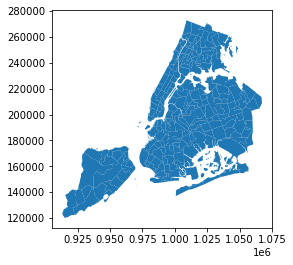

In [33]:
# plotting the geodataframe
nta_shape.plot()

<AxesSubplot:>

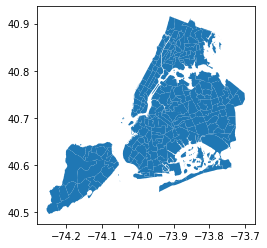

In [34]:
# changing the CRS and then plotting the geodataframe
nta_shape.to_crs(epsg=4326).plot()

## 4.3 Create Centroids from Polygons

In [35]:
# returning first five rows
nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((1038593.497 221913.624, 103936...  
1    Queens         4  MULTIPOLYGON (((1022728.281 217531.059, 102305...  
2    Queens         4  MULTIPOLYGON (((1045896.235 205384.223, 104564...  
3    Queens         4  MULTIPOLYGON (((1052996.196 196307.658, 105308...  
4  Brooklyn         3  MULTIPOLYGON (((997183.302 187255.730, 997207....

<AxesSubplot:>

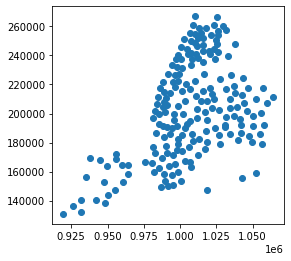

In [36]:
# returning the centroid of our shape and saving as a new column called 'centroid_column'
nta_shape['centroid_column'] = nta_shape.centroid

# setting our geometry as the new centroid column and then plotting 
nta_shape.set_geometry('centroid_column').plot()

## 4.4 Creating a GeoDataFrame from a DataFrame with Coordinates

In [37]:
# reading in our nta data as a geodataframe
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url) 

nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
1    Queens         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
2    Queens         4  MULTIPOLYGON (((-73.77758 40.73019, -73.77849 ...  
3    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
4  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...

In [38]:
# creating colums for the x and y coordinates of our geometries and deleting previous geometries
nta_shape['centroid_column'] = nta_shape.centroid
nta_shape = nta_shape.set_geometry('centroid_column')

nta_shape['x'] = nta_shape.centroid_column.x
nta_shape['y'] = nta_shape.centroid_column.y
nta_shape_no_geometry = nta_shape[['ntaname', 'x', 'y']]

nta_shape_no_geometry.head()

/var/folders/2_/t32jmn4n7cs9v7ll96cqlmn00000gn/T/ipykernel_9710/992993916.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nta_shape['centroid_column'] = nta_shape.centroid


ntaname          x          y
0           Murray Hill -73.809546  40.768352
1         East Elmhurst -73.868396  40.763352
2  Fresh Meadows-Utopia -73.783716  40.734894
3            St. Albans -73.763146  40.691202
4          Clinton Hill -73.962363  40.687967

In [39]:
# prining the type of our dataframe
print(type(nta_shape_no_geometry))

<class 'pandas.core.frame.DataFrame'>


In [40]:
# Generate GeometryArray of point geometries from x, y coordinates
nta_shape_with_geometry = gpd.GeoDataFrame(nta_shape_no_geometry, 
                                           geometry=gpd.points_from_xy(nta_shape_no_geometry.x,
                                                                       nta_shape_no_geometry.y))
# previewing our new point geometry column
nta_shape_with_geometry.head()

ntaname          x          y                    geometry
0           Murray Hill -73.809546  40.768352  POINT (-73.80955 40.76835)
1         East Elmhurst -73.868396  40.763352  POINT (-73.86840 40.76335)
2  Fresh Meadows-Utopia -73.783716  40.734894  POINT (-73.78372 40.73489)
3            St. Albans -73.763146  40.691202  POINT (-73.76315 40.69120)
4          Clinton Hill -73.962363  40.687967  POINT (-73.96236 40.68797)

In [41]:
# returning the type of our new geodataframe
type(nta_shape_with_geometry)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

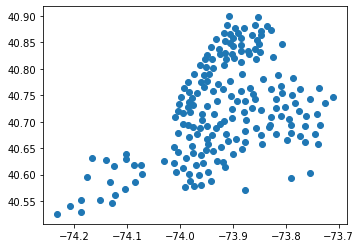

In [42]:
# plotting our data
nta_shape_with_geometry.plot()

# 5. Making Maps

GeoPandas has three basic classes of geometric objects (which are actually shapely objects):

- Points / Multi-Points

- Lines / Multi-Lines

- Polygons / Multi-Polygons

## 5.1 Points

In [43]:
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile)

school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE              SCHOOLNAME  \
0  15K001          K      2.0     K001     P.S. 001 THE BERGEN   
1  17K002          K      2.0     K002                M.S. 002   
2  21K095          K      2.0     K095  P.S. 095 THE GRAVESEND   
3  21K096          K      2.0     K096       I.S. 096 SETH LOW   
4  21K097          K      2.0     K097    P.S. 97 THE HIGHLAWN   

                          SCH_TYPE  MANAGED_BY  GEO_DISTRI  ADMIN_DIST  \
0                       Elementary           1          15          15   
1  Junior High-Intermediate-Middle           1          17          17   
2                              K-8           1          21          21   
3  Junior High-Intermediate-Middle           1          21          21   
4                       Elementary           1          21          21   

                  ADDRESS STATE_CODE    ZIP               PRINCIPAL  \
0           309 47 STREET         NY  11220        Jennifer Eusanio   
1     655 PARKSIDE AVENUE         NY  11226        ADRIENNE SPENCER   
2  345 VAN SICKLEN STREET         NY  11223           Janet Ndzibah   
3             99 AVENUE P         NY  11204  Denise Sandra Levinsky   
4   1855 STILLWELL AVENUE         NY  11223       KRISTINE MUSTILLO   

        PRIN_PH           FAX                            GRADES      City  \
0  718-567-7661  718-567-9771           PK,0K,01,02,03,04,05,SE  BROOKLYN   
1  718-462-6992  718-284-7717                       06,07,08,SE  BROOKLYN   
2  718-449-5050  718-449-3047  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN   
3  718-236-1344  718-236-2397                       06,07,08,SE  BROOKLYN   
4  718-372-7393  718-372-3842           PK,0K,01,02,03,04,05,SE  BROOKLYN   

                        geometry  
0  POINT (980985.054 175780.759)  
1  POINT (997785.136 178431.911)  
2  POINT (991224.983 156323.361)  
3  POINT (988439.681 160709.993)  
4  POINT (988205.073 158329.591)

<AxesSubplot:>

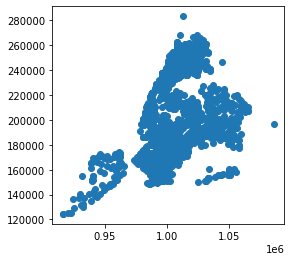

In [44]:
school_points.plot()

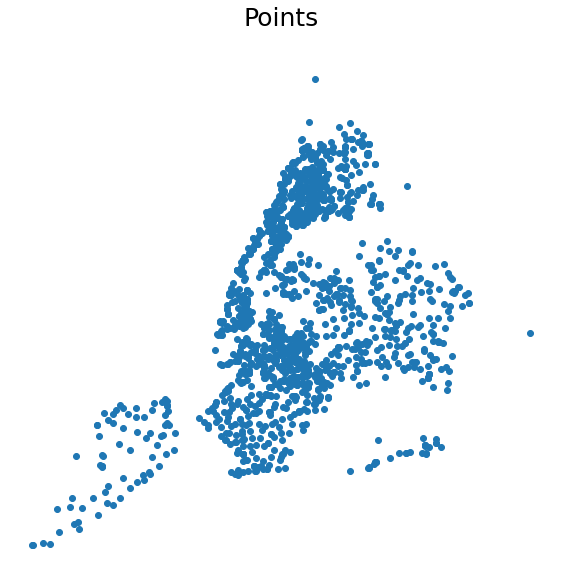

In [45]:
fig, ax = plt.subplots(figsize=(8,8)) # creating a figure

# converting to more accurate coordinate referance system
school_points = school_points.to_crs(epsg=2263)

# plotting school points 
school_points.plot(ax=ax, 
                   color='#1f77b4')

ax.set_title('Points', pad=30, fontsize=25) # setting title as 'Points'
plt.axis('off') # turning off the plot axis

plt.tight_layout() # returing a tight layout of the plot

## 5.2 Lines

In [46]:
url = 'https://data.cityofnewyork.us/api/geospatial/exjm-f27b?method=export&format=GeoJSON'
streets = gpd.read_file(url)

streets.head()

rw_type l_low_hn pre_direct st_width  r_zip r_low_hn bike_lane post_type  \
0       1       50       None     42.0  10280       51      None        PL   
1       1       66       None     42.0  10280       65      None        PL   
2       1       84       None     42.0  10280       83      None        PL   
3       1     None       None     42.0  10280     None      None        PL   
4       1     None       None     24.0  10004     None      None        PL   

   r_blkfc_id bike_trafd  ... snow_pri borocode trafdir pre_modifi  \
0  1222601917       None  ...        C        1      TW       None   
1  1222604562       None  ...        C        1      TW       None   
2  1222600933       None  ...        C        1      TW       None   
3  1222600931       None  ...        C        1      TW       None   
4   212262395       None  ...        C        1      TF       None   

     st_label physicalid  st_name    created l_high_hn  \
0  BATTERY PL          3  BATTERY 2007-11-29        64   
1  BATTERY PL          5  BATTERY 2007-11-29        82   
2  BATTERY PL          6  BATTERY 2007-11-29        98   
3  BATTERY PL          8  BATTERY 2007-11-29      None   
4  BATTERY PL         14  BATTERY 2011-04-22      None   

                                            geometry  
0  MULTILINESTRING ((-74.01793 40.70617, -74.0178...  
1  MULTILINESTRING ((-74.01757 40.70684, -74.0171...  
2  MULTILINESTRING ((-74.01712 40.70746, -74.0166...  
3  MULTILINESTRING ((-74.01694 40.70481, -74.0170...  
4  MULTILINESTRING ((-74.01429 40.70455, -74.0143...  

[5 rows x 32 columns]

<AxesSubplot:>

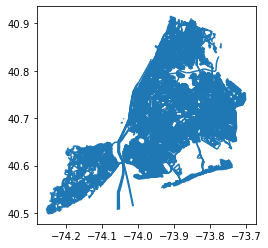

In [47]:
streets.plot()

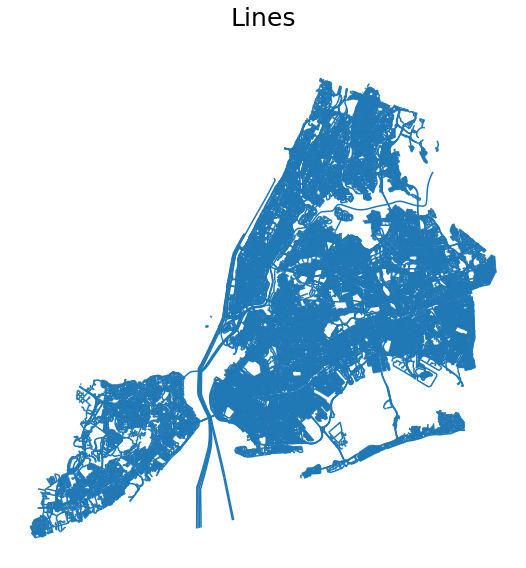

In [48]:
fig, ax = plt.subplots(figsize=(8,8))

streets = streets.to_crs(epsg=2263) 
streets.plot(ax=ax, 
             color='#1f77b4')

ax.set_title('Lines', pad=30, fontsize=25)

plt.axis('off')
plt.tight_layout()

## 5.3 Polygons

In [49]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
1    Queens         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
2    Queens         4  MULTIPOLYGON (((-73.77758 40.73019, -73.77849 ...  
3    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
4  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...

<AxesSubplot:>

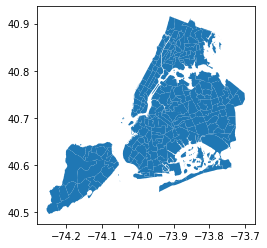

In [50]:
nta_shape.plot()

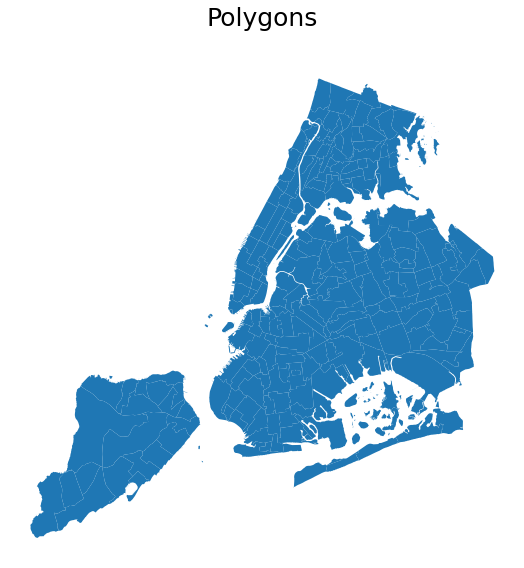

In [51]:
fig, ax = plt.subplots(figsize=(8,8))

nta_shape = nta_shape.to_crs(epsg=2263)
nta_shape.plot(ax=ax, 
               color='#1f77b4') 

ax.set_title('Polygons', pad=30, fontsize=25)

plt.axis('off')
plt.tight_layout()

## 5.4 Maps with Layers

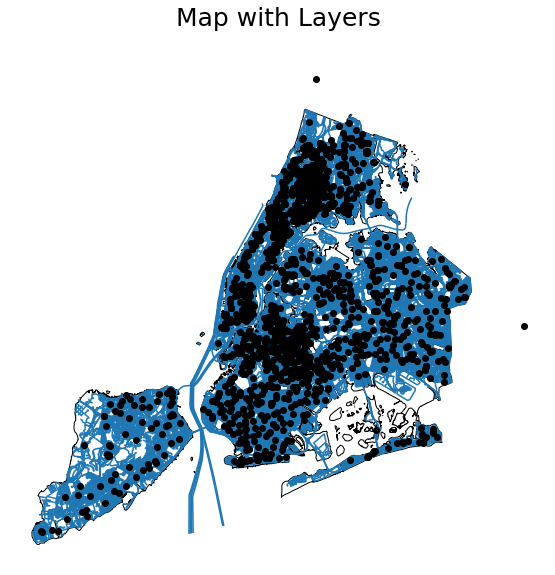

In [52]:
fig, ax = plt.subplots(figsize=(8,8))

nta_shape.plot(ax=ax, 
               color='white', 
               edgecolor='black', 
               zorder=1) # the order they should be plotted

streets.plot(ax=ax, 
             zorder=2)

school_points.plot(ax=ax, 
                   color='black', 
                   zorder=3)

ax.set_title('Map with Layers', pad=30, fontsize=25)

plt.axis('off')
plt.tight_layout()

## 5.5 Adding Background Map

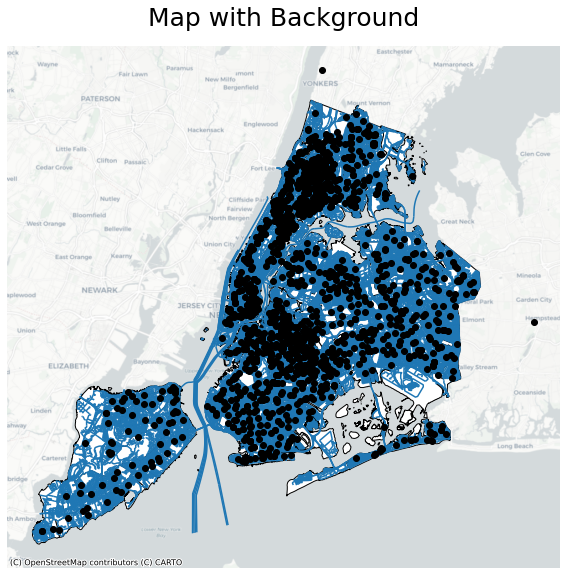

In [53]:
fig, ax = plt.subplots(figsize=(8,8))

nta_shape.plot(ax=ax, 
               color='white', 
               edgecolor='black', 
               zorder=1)

streets.plot(ax=ax, 
             zorder=2)

school_points.plot(ax=ax, 
                   color='black', 
                   zorder=3)
# adding basemap
ctx.add_basemap(ax, 
                crs=2263, 
                source=ctx.providers.CartoDB.Positron)


ax.set_title('Map with Background', pad=20, fontsize=25)

plt.axis('off')
plt.tight_layout()

## 5.6 Clip Data

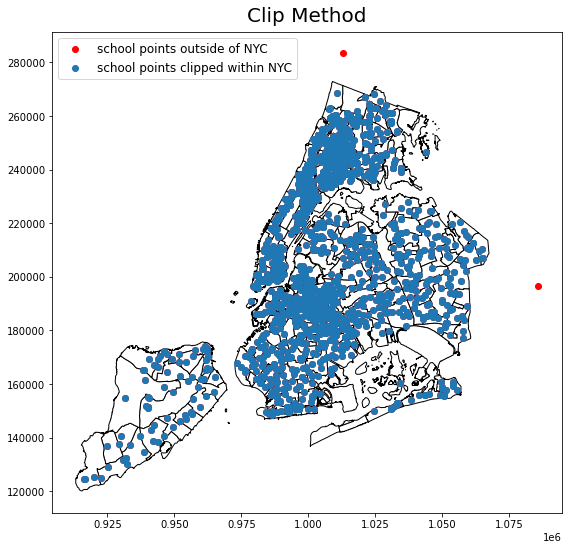

In [54]:
# clipping the school points that only fall within the nta shapes
school_points_clipped = gpd.clip(school_points, nta_shape)

fig, ax = plt.subplots(figsize=(8,8))

nta_shape.plot(ax=ax, 
               color="white", 
               edgecolor='black', 
               zorder=0)    

# plotting all points
school_points.plot(ax=ax, 
                   color='red', 
                   zorder=1,
                   label='school points outside of NYC')

# plotting only the clipped points
school_points_clipped.plot(ax=ax, 
                           color='#1f77b4', 
                           zorder=2, 
                           label='school points clipped within NYC')

ax.set_title('Clip Method', pad=10, fontsize=20)
plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()

# 6. Joining Data

## 6.1 Attribute Join

In [55]:
# reading in nta data
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
1    Queens         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
2    Queens         4  MULTIPOLYGON (((-73.77758 40.73019, -73.77849 ...  
3    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
4  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...

In [56]:
# reading in population by nta data
url = 'https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD'
nyc_pop = pd.read_csv(url)

nyc_pop.head()

Borough  Year  FIPS County Code NTA Code                         NTA Name  \
0   Bronx  2000                 5     BX01               Claremont-Bathgate   
1   Bronx  2000                 5     BX03  Eastchester-Edenwald-Baychester   
2   Bronx  2000                 5     BX05       Bedford Park-Fordham North   
3   Bronx  2000                 5     BX06                          Belmont   
4   Bronx  2000                 5     BX07                        Bronxdale   

   Population  
0       28149  
1       35422  
2       55329  
3       25967  
4       34309

In [57]:
print(nyc_pop['Year'].unique())

# only saving data from year 2010; dropping year 2000 records
nyc_pop = nyc_pop.loc[nyc_pop['Year'] == 2010]

print(nyc_pop['Year'].unique())

[2000 2010]
[2010]


In [58]:
# making sure our join field is the same datatype
print(nta_shape['ntaname'].dtype)
print(nyc_pop['NTA Name'].dtype)

object
object


In [59]:
nta_shape.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ntacode      195 non-null    object  
 1   shape_area   195 non-null    object  
 2   county_fips  195 non-null    object  
 3   ntaname      195 non-null    object  
 4   shape_leng   195 non-null    object  
 5   boro_name    195 non-null    object  
 6   boro_code    195 non-null    object  
 7   geometry     195 non-null    geometry
dtypes: geometry(1), object(7)
memory usage: 12.3+ KB


In [60]:
# merging our nta shape data with the population data
nta_with_pop = nta_shape.merge(nyc_pop, 
                               left_on='ntacode', 
                               right_on='NTA Code')

In [61]:
nta_with_pop.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  \
0    Queens         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...   
1    Queens         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...   
2    Queens         4  MULTIPOLYGON (((-73.77758 40.73019, -73.77849 ...   
3    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...   
4  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...   

    Borough  Year  FIPS County Code NTA Code              NTA Name  Population  
0    Queens  2010                81     QN51           Murray Hill       51739  
1    Queens  2010                81     QN27         East Elmhurst       23150  
2    Queens  2010                81     QN41  Fresh Meadows-Utopia       17812  
3    Queens  2010                81     QN08            St. Albans       48593  
4  Brooklyn  2010                47     BK69          Clinton Hill       34791

In [62]:
# now our nta shape has the new columns from our population data
nta_with_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ntacode           195 non-null    object  
 1   shape_area        195 non-null    object  
 2   county_fips       195 non-null    object  
 3   ntaname           195 non-null    object  
 4   shape_leng        195 non-null    object  
 5   boro_name         195 non-null    object  
 6   boro_code         195 non-null    object  
 7   geometry          195 non-null    geometry
 8   Borough           195 non-null    object  
 9   Year              195 non-null    int64   
 10  FIPS County Code  195 non-null    int64   
 11  NTA Code          195 non-null    object  
 12  NTA Name          195 non-null    object  
 13  Population        195 non-null    int64   
dtypes: geometry(1), int64(3), object(10)
memory usage: 22.9+ KB


## 6.2 Spatial Join

In [63]:
# reading in nta shape data
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
1    Queens         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
2    Queens         4  MULTIPOLYGON (((-73.77758 40.73019, -73.77849 ...  
3    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
4  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...

In [64]:
# reading in schools points data
zipfile = 'https://data.cityofnewyork.us/download/jfju-ynrr/application%2Fzip'
school_points = gpd.read_file(zipfile)

school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE              SCHOOLNAME  \
0  15K001          K      2.0     K001     P.S. 001 THE BERGEN   
1  17K002          K      2.0     K002                M.S. 002   
2  21K095          K      2.0     K095  P.S. 095 THE GRAVESEND   
3  21K096          K      2.0     K096       I.S. 096 SETH LOW   
4  21K097          K      2.0     K097    P.S. 97 THE HIGHLAWN   

                          SCH_TYPE  MANAGED_BY  GEO_DISTRI  ADMIN_DIST  \
0                       Elementary           1          15          15   
1  Junior High-Intermediate-Middle           1          17          17   
2                              K-8           1          21          21   
3  Junior High-Intermediate-Middle           1          21          21   
4                       Elementary           1          21          21   

                  ADDRESS STATE_CODE    ZIP               PRINCIPAL  \
0           309 47 STREET         NY  11220        Jennifer Eusanio   
1     655 PARKSIDE AVENUE         NY  11226        ADRIENNE SPENCER   
2  345 VAN SICKLEN STREET         NY  11223           Janet Ndzibah   
3             99 AVENUE P         NY  11204  Denise Sandra Levinsky   
4   1855 STILLWELL AVENUE         NY  11223       KRISTINE MUSTILLO   

        PRIN_PH           FAX                            GRADES      City  \
0  718-567-7661  718-567-9771           PK,0K,01,02,03,04,05,SE  BROOKLYN   
1  718-462-6992  718-284-7717                       06,07,08,SE  BROOKLYN   
2  718-449-5050  718-449-3047  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN   
3  718-236-1344  718-236-2397                       06,07,08,SE  BROOKLYN   
4  718-372-7393  718-372-3842           PK,0K,01,02,03,04,05,SE  BROOKLYN   

                        geometry  
0  POINT (980985.054 175780.759)  
1  POINT (997785.136 178431.911)  
2  POINT (991224.983 156323.361)  
3  POINT (988439.681 160709.993)  
4  POINT (988205.073 158329.591)

In [65]:
# identifying the CRS
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [66]:
# identifying the CRS
school_points.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [67]:
# changing CRS so they both match
nta_shape.to_crs(epsg=2263, inplace=True)
nta_shape.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [68]:
school_points.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1709 entries, 0 to 1708
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ATS_CODE    1707 non-null   object  
 1   BORO        1693 non-null   object  
 2   BORONUM     1709 non-null   float64 
 3   LOC_CODE    1709 non-null   object  
 4   SCHOOLNAME  1709 non-null   object  
 5   SCH_TYPE    1709 non-null   object  
 6   MANAGED_BY  1709 non-null   int64   
 7   GEO_DISTRI  1709 non-null   int64   
 8   ADMIN_DIST  1709 non-null   int64   
 9   ADDRESS     1709 non-null   object  
 10  STATE_CODE  1709 non-null   object  
 11  ZIP         1709 non-null   int64   
 12  PRINCIPAL   1693 non-null   object  
 13  PRIN_PH     1694 non-null   object  
 14  FAX         1657 non-null   object  
 15  GRADES      1708 non-null   object  
 16  City        1709 non-null   object  
 17  geometry    1709 non-null   geometry
dtypes: float64(1), geometry(1), int64(4), ob

In [69]:
# spatial join nta data to the school points data with operation = 'intersects'
school_points_with_nta = gpd.sjoin(school_points, 
                                   nta_shape, 
                                   how="inner", 
                                   op='intersects')

/Users/geribauer/anaconda3/envs/geopandas_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [70]:
school_points_with_nta.head()

ATS_CODE BORO  BORONUM LOC_CODE  \
0    15K001          K      2.0     K001   
36   15K136          K      2.0     K136   
65   15K172          K      2.0     K172   
168  15K295          K      2.0     K295   
222  75K371          K      2.0     K371   

                               SCHOOLNAME                         SCH_TYPE  \
0                     P.S. 001 THE BERGEN                       Elementary   
36              I.S. 136 CHARLES O. DEWEY  Junior High-Intermediate-Middle   
65   P.S. 172 BEACON SCHOOL OF EXCELLENCE                       Elementary   
168                              P.S. 295                       Elementary   
222         P.S. 371 - LILLIAN L. RASHKIS                      High school   

     MANAGED_BY  GEO_DISTRI  ADMIN_DIST        ADDRESS  ...      City  \
0             1          15          15  309 47 STREET  ...  BROOKLYN   
36            1          15          15  4004 4 AVENUE  ...  BROOKLYN   
65            1          15          15   825 4 AVENUE  ...  BROOKLYN   
168           1          15          15  330 18 STREET  ...  BROOKLYN   
222           1          15          75  355 37 STREET  ...  BROOKLYN   

                          geometry index_right ntacode     shape_area  \
0    POINT (980985.054 175780.759)         154    BK32  49955871.5101   
36   POINT (982218.628 176813.496)         154    BK32  49955871.5101   
65   POINT (984158.590 178921.890)         154    BK32  49955871.5101   
168  POINT (987330.493 180120.659)         154    BK32  49955871.5101   
222  POINT (982776.837 177607.547)         154    BK32  49955871.5101   

    county_fips           ntaname     shape_leng  boro_name boro_code  
0           047  Sunset Park West  83039.4322423   Brooklyn         3  
36          047  Sunset Park West  83039.4322423   Brooklyn         3  
65          047  Sunset Park West  83039.4322423   Brooklyn         3  
168         047  Sunset Park West  83039.4322423   Brooklyn         3  
222         047  Sunset Park West  83039.4322423   Brooklyn         3  

[5 rows x 26 columns]

In [71]:
school_points_with_nta.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1707 entries, 0 to 1615
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ATS_CODE     1707 non-null   object  
 1   BORO         1691 non-null   object  
 2   BORONUM      1707 non-null   float64 
 3   LOC_CODE     1707 non-null   object  
 4   SCHOOLNAME   1707 non-null   object  
 5   SCH_TYPE     1707 non-null   object  
 6   MANAGED_BY   1707 non-null   int64   
 7   GEO_DISTRI   1707 non-null   int64   
 8   ADMIN_DIST   1707 non-null   int64   
 9   ADDRESS      1707 non-null   object  
 10  STATE_CODE   1707 non-null   object  
 11  ZIP          1707 non-null   int64   
 12  PRINCIPAL    1693 non-null   object  
 13  PRIN_PH      1693 non-null   object  
 14  FAX          1656 non-null   object  
 15  GRADES       1706 non-null   object  
 16  City         1707 non-null   object  
 17  geometry     1707 non-null   geometry
 18  index_right  1707 no

<AxesSubplot:>

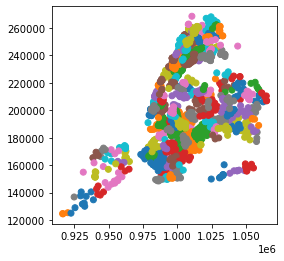

In [72]:
# school points data now has nta information
school_points_with_nta.plot(column='ntaname')

# 7. Indexing and Selecting Data

In [73]:
# reading in nta data
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
1    Queens         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
2    Queens         4  MULTIPOLYGON (((-73.77758 40.73019, -73.77849 ...  
3    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
4  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...

<AxesSubplot:>

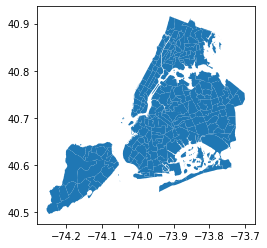

In [74]:
nta_shape.plot()

In [75]:
# slicing the nta data with everything up to lon = -74.1
nta_shape = nta_shape.cx[:-74.1, :]
nta_shape.head()

ntacode     shape_area county_fips  \
11    SI32  64963357.7696         085   
76    SI36  67011969.3941         085   
85    SI99  23377619.1354         085   
95    SI07  63256575.2485         085   
96    SI22  56028570.7705         085   

                                      ntaname     shape_leng      boro_name  \
11                          Rossville-Woodrow  33247.2577048  Staten Island   
76          Old Town-Dongan Hills-South Beach  41973.1359855  Staten Island   
85            park-cemetery-etc-Staten Island  41469.1393605  Staten Island   
95                                Westerleigh  41655.7048157  Staten Island   
96  West New Brighton-New Brighton-St. George  66052.5937578  Staten Island   

   boro_code                                           geometry  
11         5  MULTIPOLYGON (((-74.20326 40.55563, -74.20291 ...  
76         5  MULTIPOLYGON (((-74.06503 40.58899, -74.06503 ...  
85         5  MULTIPOLYGON (((-74.11338 40.54807, -74.11341 ...  
95         5  MULTIPOLYGON (((-74.13047 40.63089, -74.13014 ...  
96         5  MULTIPOLYGON (((-74.07258 40.63794, -74.07330 ...

<AxesSubplot:>

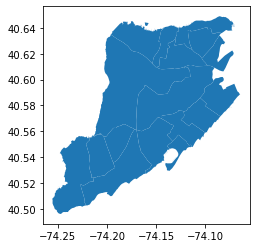

In [76]:
nta_shape.plot()

In [77]:
# slicing the nta data with everything up to lon = -74.1 and everything after lat = 40.56
nta_shape = nta_shape.cx[:-74.1, 40.56:]
nta_shape.head()

ntacode     shape_area county_fips  \
76     SI36  67011969.3941         085   
95     SI07  63256575.2485         085   
96     SI22  56028570.7705         085   
103    SI24  184889785.853         085   
121    SI25  55943838.3264         085   

                                               ntaname     shape_leng  \
76                   Old Town-Dongan Hills-South Beach  41973.1359855   
95                                         Westerleigh  41655.7048157   
96           West New Brighton-New Brighton-St. George  66052.5937578   
103  Todt Hill-Emerson Hill-Heartland Village-Light...  75942.8048698   
121                              Oakwood-Oakwood Beach  44221.9165795   

         boro_name boro_code  \
76   Staten Island         5   
95   Staten Island         5   
96   Staten Island         5   
103  Staten Island         5   
121  Staten Island         5   

                                              geometry  
76   MULTIPOLYGON (((-74.06503 40.58899, -74.06503 ...  
95   MULTIPOLYGON (((-74.13047 40.63089, -74.13014 ...  
96   MULTIPOLYGON (((-74.07258 40.63794, -74.07330 ...  
103  MULTIPOLYGON (((-74.09777 40.61062, -74.09730 ...  
121  MULTIPOLYGON (((-74.12154 40.57515, -74.12173 ...

<AxesSubplot:>

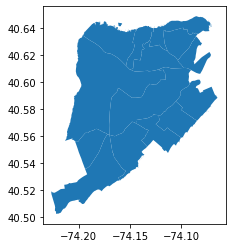

In [78]:
nta_shape.plot()

# 8. Coordinate Reference Systems

In [79]:
# reading in nta data
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
1    Queens         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
2    Queens         4  MULTIPOLYGON (((-73.77758 40.73019, -73.77849 ...  
3    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
4  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...

In [80]:
# checking the current CRS
nta_shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

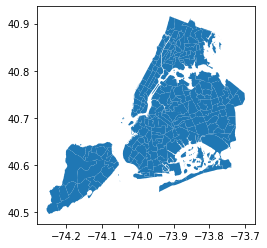

In [81]:
nta_shape.plot()

In [82]:
# switching CRS of nta to epsg = 2263
nta_shape.to_crs(epsg=2263, inplace=True)

nta_shape.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

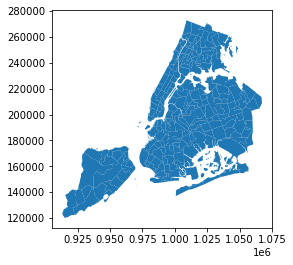

In [83]:
nta_shape.plot()

# 9. Types of Maps

In [84]:
# reading in nyc nta population data as 'nyc_pop'
url = 'https://data.cityofnewyork.us/api/views/swpk-hqdp/rows.csv?accessType=DOWNLOAD'
nyc_pop = pd.read_csv(url)

nyc_pop.head()

Borough  Year  FIPS County Code NTA Code                         NTA Name  \
0   Bronx  2000                 5     BX01               Claremont-Bathgate   
1   Bronx  2000                 5     BX03  Eastchester-Edenwald-Baychester   
2   Bronx  2000                 5     BX05       Bedford Park-Fordham North   
3   Bronx  2000                 5     BX06                          Belmont   
4   Bronx  2000                 5     BX07                        Bronxdale   

   Population  
0       28149  
1       35422  
2       55329  
3       25967  
4       34309

In [85]:
nyc_pop['Year'].unique()

array([2000, 2010])

In [86]:
# saving only the population numbers for the year 2010
nyc_pop = nyc_pop.loc[nyc_pop['Year'] == 2010]

nyc_pop['Year'].unique()

array([2010])

In [87]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
1    Queens         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
2    Queens         4  MULTIPOLYGON (((-73.77758 40.73019, -73.77849 ...  
3    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
4  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...

In [88]:
# joining our nta population data to our nta shapes data
nta_pop = nta_shape.merge(nyc_pop, 
                          left_on='ntacode', 
                          right_on='NTA Code', 
                          how='inner')

nta_pop.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  \
0    Queens         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...   
1    Queens         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...   
2    Queens         4  MULTIPOLYGON (((-73.77758 40.73019, -73.77849 ...   
3    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...   
4  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...   

    Borough  Year  FIPS County Code NTA Code              NTA Name  Population  
0    Queens  2010                81     QN51           Murray Hill       51739  
1    Queens  2010                81     QN27         East Elmhurst       23150  
2    Queens  2010                81     QN41  Fresh Meadows-Utopia       17812  
3    Queens  2010                81     QN08            St. Albans       48593  
4  Brooklyn  2010                47     BK69          Clinton Hill       34791

In [89]:
nta_pop.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [90]:
nta_pop = nta_pop.to_crs(epsg=2263)

nta_pop.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [91]:
# returning the area of our nta as a new column 'sq_ft'
nta_pop['sq_ft'] = nta_pop.area

nta_pop.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  \
0    Queens         4  MULTIPOLYGON (((1038593.497 221913.624, 103936...   
1    Queens         4  MULTIPOLYGON (((1022728.281 217531.059, 102305...   
2    Queens         4  MULTIPOLYGON (((1045896.235 205384.223, 104564...   
3    Queens         4  MULTIPOLYGON (((1052996.196 196307.658, 105308...   
4  Brooklyn         3  MULTIPOLYGON (((997183.302 187255.730, 997207....   

    Borough  Year  FIPS County Code NTA Code              NTA Name  \
0    Queens  2010                81     QN51           Murray Hill   
1    Queens  2010                81     QN27         East Elmhurst   
2    Queens  2010                81     QN41  Fresh Meadows-Utopia   
3    Queens  2010                81     QN08            St. Albans   
4  Brooklyn  2010                47     BK69          Clinton Hill   

   Population         sq_ft  
0       51739  5.248831e+07  
1       23150  1.972696e+07  
2       17812  2.777493e+07  
3       48593  7.741292e+07  
4       34791  2.052830e+07

In [92]:
# converting square feet to square miles and saving as a new column
nta_pop['sq_mi'] = nta_pop['sq_ft'] / 27878400

nta_pop.head()   

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  \
0    Queens         4  MULTIPOLYGON (((1038593.497 221913.624, 103936...   
1    Queens         4  MULTIPOLYGON (((1022728.281 217531.059, 102305...   
2    Queens         4  MULTIPOLYGON (((1045896.235 205384.223, 104564...   
3    Queens         4  MULTIPOLYGON (((1052996.196 196307.658, 105308...   
4  Brooklyn         3  MULTIPOLYGON (((997183.302 187255.730, 997207....   

    Borough  Year  FIPS County Code NTA Code              NTA Name  \
0    Queens  2010                81     QN51           Murray Hill   
1    Queens  2010                81     QN27         East Elmhurst   
2    Queens  2010                81     QN41  Fresh Meadows-Utopia   
3    Queens  2010                81     QN08            St. Albans   
4  Brooklyn  2010                47     BK69          Clinton Hill   

   Population         sq_ft     sq_mi  
0       51739  5.248831e+07  1.882759  
1       23150  1.972696e+07  0.707607  
2       17812  2.777493e+07  0.996288  
3       48593  7.741292e+07  2.776806  
4       34791  2.052830e+07  0.736351

In [93]:
# creating a new column of the population density (pop/area) of each nta
nta_pop['density (pop/sq_mi)'] = nta_pop['Population'] / nta_pop['sq_mi']

nta_pop.sort_values(by='density (pop/sq_mi)', ascending=False).iloc[:5,-6:]

NTA Code         NTA Name  Population         sq_ft     sq_mi  \
54      MN32        Yorkville       77942  1.364822e+07  0.489563   
51      BX40    Fordham South       28262  6.308875e+06  0.226300   
108     MN22     East Village       44136  1.089429e+07  0.390779   
88      MN14   Lincoln Square       61489  1.580548e+07  0.566944   
12      MN12  Upper West Side      132378  3.437994e+07  1.233211   

     density (pop/sq_mi)  
54         159207.405437  
51         124887.458298  
108        112943.709742  
88         108457.012367  
12         107344.191255

## 9.1 Choropleth Maps

<AxesSubplot:>

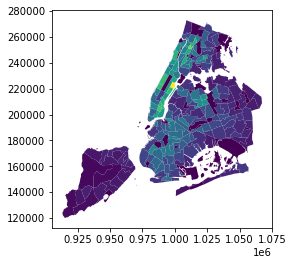

In [94]:
# plotting a choropleth map on the column 'density (pop/sq_mi)'
nta_pop.plot(column='density (pop/sq_mi)')

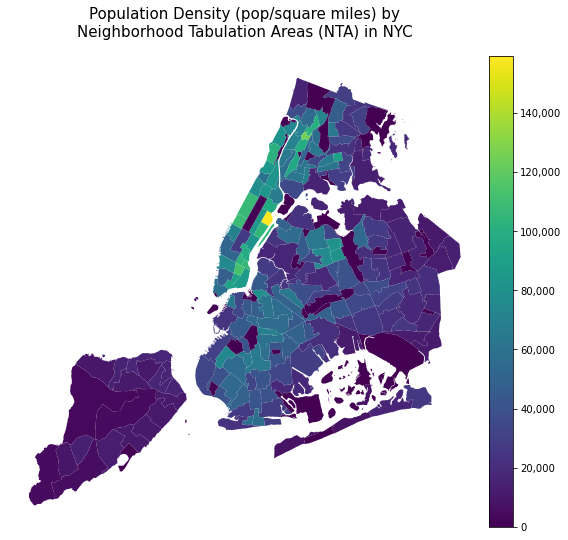

In [95]:
fig, ax = plt.subplots(figsize=(8,8))

# saving variable to format integers as strings with commas
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))

# resizing the color bar to scale to the plot
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# plotting 'density (pop/sq_mi)' as a choropleth map
nta_pop.plot(column='density (pop/sq_mi)', 
             ax=ax, # plotting on the generated axis
             cax=cax, # legend of the color bar
             legend=True, # turning on legend
             legend_kwds={'format':comma_fmt}) # formatting the color map legend with thousand separator

# setting title
ax.set_title('Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15, 
             pad=20)


ax.axis('off')
plt.tight_layout()

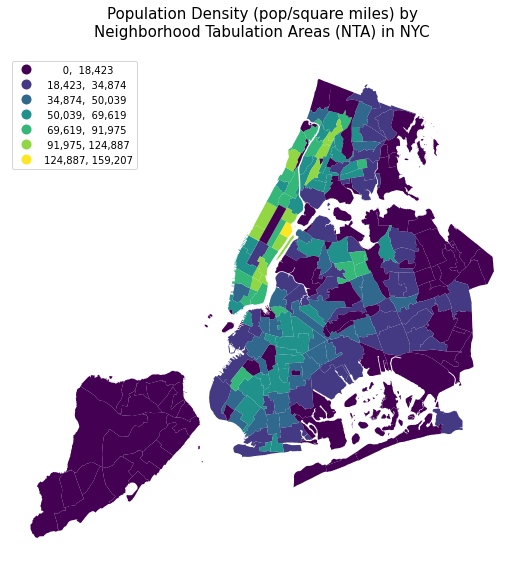

In [96]:
fig, ax = plt.subplots(figsize=(8,8))

nta_pop.plot(column='density (pop/sq_mi)', 
             ax=ax, 
             legend=True, 
             scheme='fisher_jenks',
             k=7,
             legend_kwds={'loc': "upper left", 
                          'fmt': "{:,.0f}",
                          'fontsize': "10"})     
        
ax.set_title('Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15, 
             pad=20)

plt.axis('off')
plt.tight_layout()

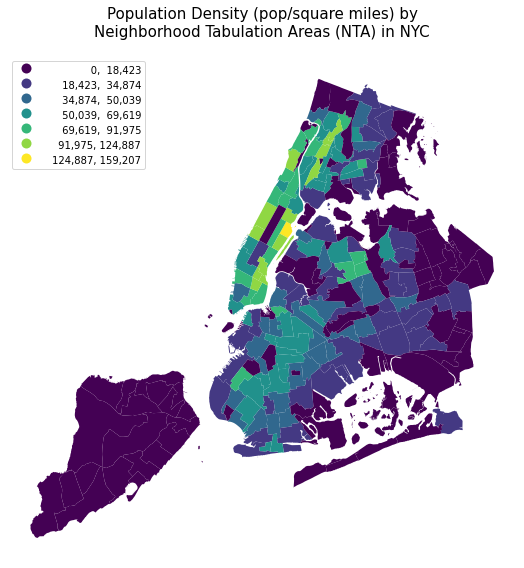

In [97]:
# align legend numbers

fig, ax = plt.subplots(figsize=(8,8))

nta_pop.plot(column='density (pop/sq_mi)', 
             ax=ax, 
             legend=True, 
             scheme='fisher_jenks',
             k=7,
             legend_kwds={'loc': "upper left", 
                          'fmt': "{:,.0f}",
                          'fontsize': "10"})

# returning the legend
leg = ax.get_legend()

# making the legend labels right horizontal aligned
hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(125)  # need to adapt this manually
        row.mode= "expand"
        row.align="right"     
        
ax.set_title('Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15, 
             pad=20)

plt.axis('off')
plt.tight_layout()

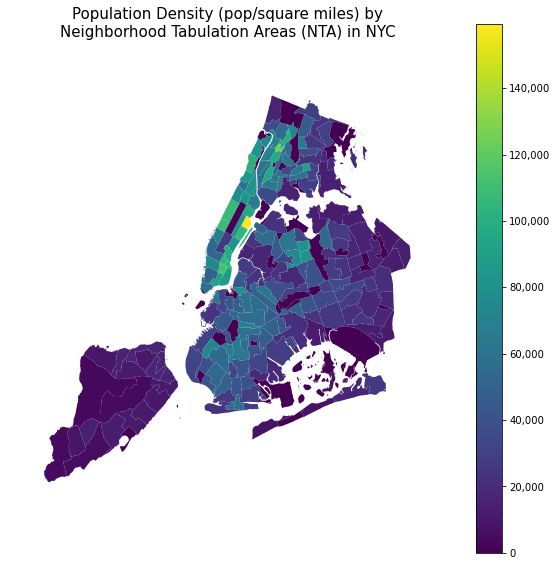

In [98]:
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))

ax = gplt.choropleth(nta_pop.to_crs(4326), 
                     hue='density (pop/sq_mi)', 
                     projection=gcrs.AlbersEqualArea(),
                     edgecolor='None', 
                     linewidth=1,
                     cmap='viridis',
                     legend=True,
                     legend_kwargs={'format': comma_fmt},
                     figsize=(8,8),
                     zorder=0)

gplt.polyplot(nta_shape.to_crs(4326), 
              ax=ax, 
              zorder=1,
              edgecolor='None')

ax.set_title('Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15, 
             pad=20)

plt.axis('off')
plt.tight_layout()

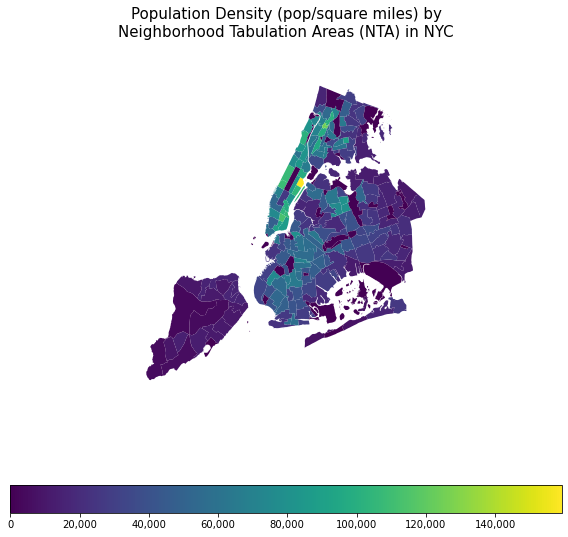

In [99]:
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))

ax = gplt.choropleth(nta_pop.to_crs(4326), 
                     hue='density (pop/sq_mi)', 
                     projection=gcrs.AlbersEqualArea(),
                     edgecolor='None', 
                     linewidth=1,
                     cmap='viridis',
                     legend=True,
                     legend_kwargs={'format': comma_fmt,
                                    'orientation': 'horizontal'},
                     figsize=(8,8),
                     zorder=0)

gplt.polyplot(nta_shape.to_crs(4326), 
              ax=ax, 
              zorder=1,
              edgecolor='None')

ax.set_title('Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15, 
             pad=20)

plt.axis('off')
plt.tight_layout()

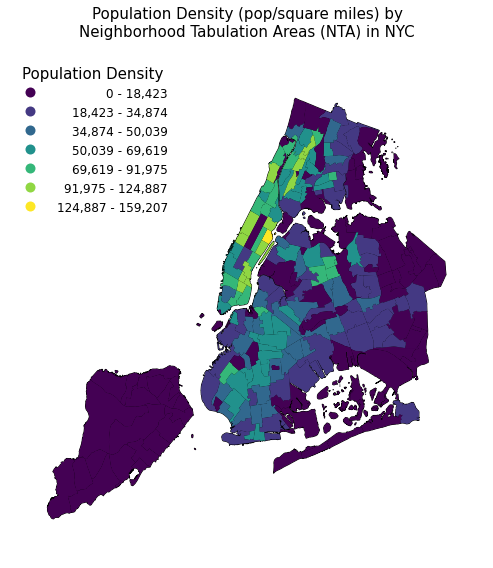

In [100]:
# setting the map classifier as Fisher Jenks with 7 classes
scheme = mc.FisherJenks(nta_pop['density (pop/sq_mi)'], k=7)

ax = gplt.choropleth(nta_pop.to_crs(4326), 
                     hue='density (pop/sq_mi)', 
                     projection=gcrs.AlbersEqualArea(),
                     cmap='viridis',
                     legend=True, 
                     legend_kwargs={'frameon': False, 
                                    'loc': 'upper left', 
                                    'fontsize':'large', 
                                    'title':'Population Density',
                                    'title_fontsize':'15'},
                     scheme=scheme, 
                     figsize=(8,8),
                     zorder=1)

gplt.polyplot(nta_shape.to_crs(4326), 
              ax=ax, 
              zorder=0)

leg = ax.get_legend()

# formatting the legend label numbers with thousand separators
for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)
    
hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(150)  # need to adapt this manually
        row.mode= "expand"
        row.align="right"    

ax.set_title('Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15, 
             pad=20)
plt.axis('off')
plt.tight_layout()

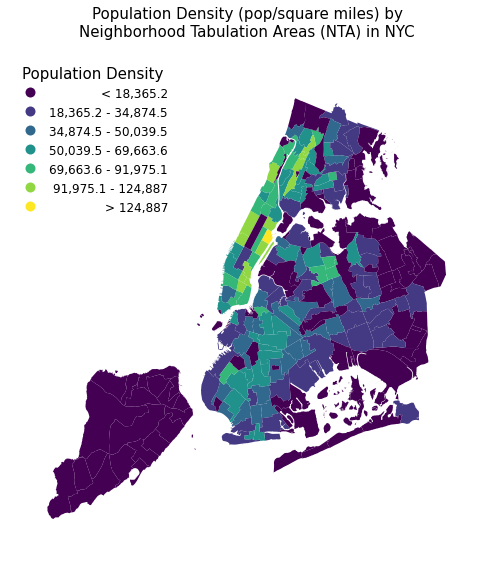

In [101]:
scheme = mc.FisherJenks(nta_pop['density (pop/sq_mi)'], k=7)

ax = gplt.choropleth(nta_pop.to_crs(4326), 
                     hue='density (pop/sq_mi)', 
                     projection=gcrs.AlbersEqualArea(),
                     cmap='viridis',
                     legend=True, 
                     legend_kwargs={'frameon': False, 
                                    'loc': 'upper left', 
                                    'fontsize':'large', 
                                    'title':'Population Density',
                                    'title_fontsize':'15'},
                     scheme=scheme, 
                     figsize=(8,8),
                     
                     # manually setting legend labels
                     legend_labels=[
                                    '< 18,365.2', 
                                    '18,365.2 - 34,874.5', 
                                    '34,874.5 - 50,039.5',
                                    '50,039.5 - 69,663.6', 
                                    '69,663.6 - 91,975.1',
                                    '91,975.1 - 124,887',
                                    '> 124,887',
                                    ])

gplt.polyplot(nta_shape.to_crs(4326), 
              ax=ax, 
              zorder=0,
              edgecolor='None')

leg = ax.get_legend()
    
hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(150)  # need to adapt this manually
        row.mode= "expand"
        row.align="right" 

ax.set_title('Population Density (pop/square miles) by\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15, 
             pad=20)
plt.axis('off')
plt.tight_layout()

## 9.2 Heat Maps

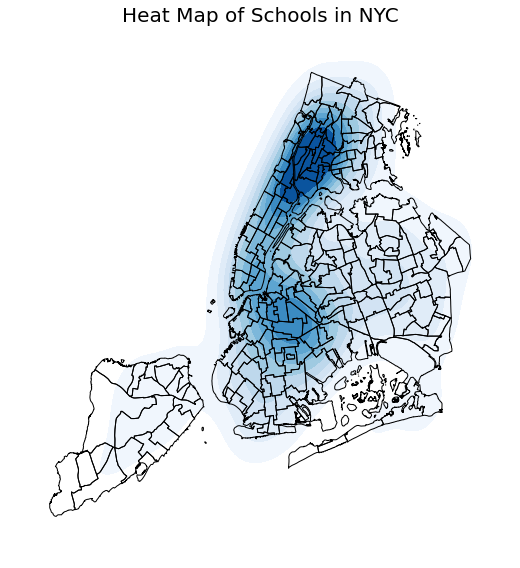

In [102]:
ax = gplt.kdeplot(school_points.to_crs(4326),
                  shade=True, 
                  cmap='Blues',
                  projection=gplt.crs.AlbersEqualArea(), 
                  figsize=(8,8))

gplt.polyplot(nta_shape.to_crs(4326), 
              ax=ax, 
              zorder=1)

ax.set_title('Heat Map of Schools in NYC', fontsize=20)
plt.axis('off')
plt.tight_layout()

## 9.3 Hexbin Map

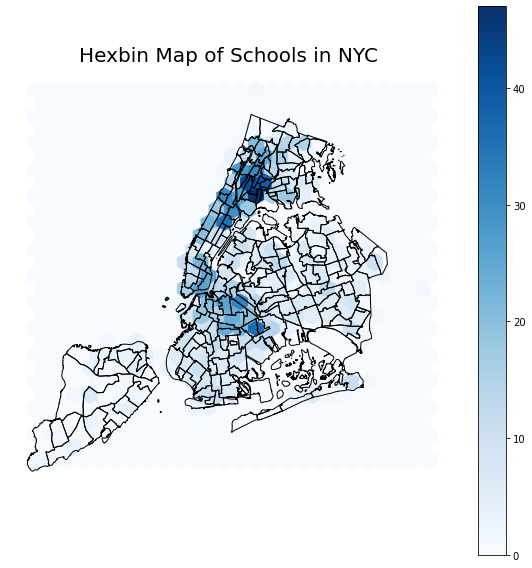

In [103]:
fig, ax = plt.subplots(figsize=(8,8))

school_points['x'] = school_points['geometry'].x
school_points['y'] = school_points['geometry'].y
df = pd.DataFrame(school_points)

df.plot.hexbin(x='x', 
               y='y', 
               gridsize=25, 
               ax=ax,
               cmap='Blues')


nta_shape.to_crs(epsg=2263).plot(ax=ax, 
                                 color='None', 
                                 edgecolor='black', 
                                 cax=cax)
ax.set_title('Hexbin Map of Schools in NYC', fontsize=20, pad=10)
plt.axis('off')
plt.tight_layout()

## 9.4 Proportional Symbol Map

In [104]:
nta_pop['centroid'] = nta_pop.centroid
nta_pop = nta_pop.set_geometry('centroid')

nta_pop.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  \
0    Queens         4  MULTIPOLYGON (((1038593.497 221913.624, 103936...   
1    Queens         4  MULTIPOLYGON (((1022728.281 217531.059, 102305...   
2    Queens         4  MULTIPOLYGON (((1045896.235 205384.223, 104564...   
3    Queens         4  MULTIPOLYGON (((1052996.196 196307.658, 105308...   
4  Brooklyn         3  MULTIPOLYGON (((997183.302 187255.730, 997207....   

    Borough  Year  FIPS County Code NTA Code              NTA Name  \
0    Queens  2010                81     QN51           Murray Hill   
1    Queens  2010                81     QN27         East Elmhurst   
2    Queens  2010                81     QN41  Fresh Meadows-Utopia   
3    Queens  2010                81     QN08            St. Albans   
4  Brooklyn  2010                47     BK69          Clinton Hill   

   Population         sq_ft     sq_mi  density (pop/sq_mi)  \
0       51739  5.248831e+07  1.882759         27480.413535   
1       23150  1.972696e+07  0.707607         32715.892314   
2       17812  2.777493e+07  0.996288         17878.356821   
3       48593  7.741292e+07  2.776806         17499.599104   
4       34791  2.052830e+07  0.736351         47247.829542   

                         centroid  
0  POINT (1037005.260 219265.588)  
1  POINT (1020706.747 217414.118)  
2  POINT (1044189.872 207092.732)  
3  POINT (1049933.729 191188.768)  
4   POINT (994687.841 189923.623)

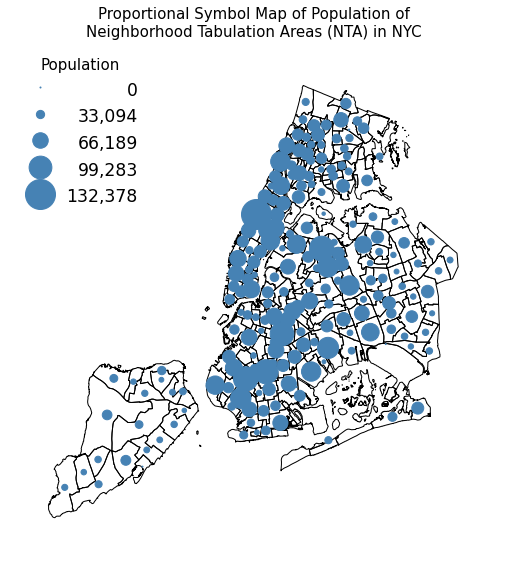

In [105]:
ax = gplt.pointplot(nta_pop.set_geometry('centroid').to_crs(4326), 
                    projection=gcrs.AlbersEqualArea(),
                    figsize=(8,8),
                    scale='Population', 
                    limits=(1, 30), 
                    legend=True,
                    legend_kwargs={'frameon': False, 
                                   'loc': 'upper left', 
                                   'fontsize':'xx-large', 
                                   'title':'Population',
                                   'title_fontsize':'15'})

gplt.polyplot(nta_shape.to_crs(4326), 
              projection=gcrs.AlbersEqualArea(),
              ax=ax)

leg = ax.get_legend()

for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    new_text = f'{int(lower):,.0f}'
    lbl.set_text(new_text)

hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(115) 
        row.mode= "expand"
        row.align="right"

ax.set_title('Proportional Symbol Map of Population of\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15)
plt.axis('off')
plt.tight_layout()

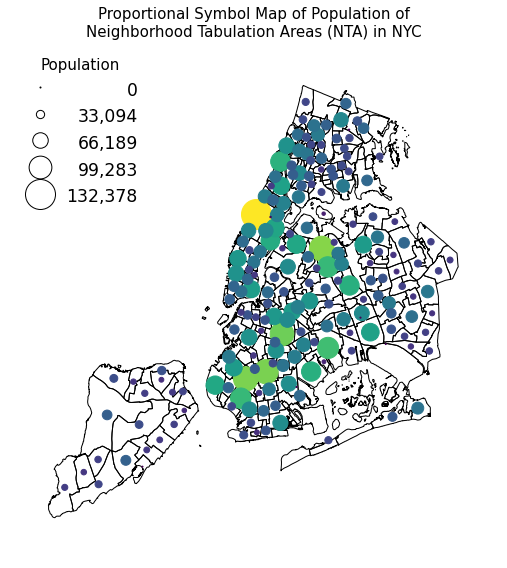

In [106]:
ax = gplt.pointplot(nta_pop.set_geometry('centroid').to_crs(4326), 
                    projection=gcrs.AlbersEqualArea(),
                    figsize=(8,8),
                    hue='Population', 
                    scale='Population',
                    legend_var='scale',
                    limits=(1, 30),
                    legend=True,
                    legend_kwargs={'frameon': False, 
                                   'loc': 'upper left', 
                                   'fontsize':'xx-large', 
                                   'title':'Population',
                                   'title_fontsize':'15'})

gplt.polyplot(nta_shape.to_crs(4326), 
              projection=gcrs.AlbersEqualArea(),
              ax=ax)

leg = ax.get_legend()

for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    new_text = f'{int(lower):,.0f}'
    lbl.set_text(new_text) 

hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(115) 
        row.mode= "expand"
        row.align="right"
        
ax.set_title('Proportional Symbol Map of Population of\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15)
plt.axis('off')
plt.tight_layout()

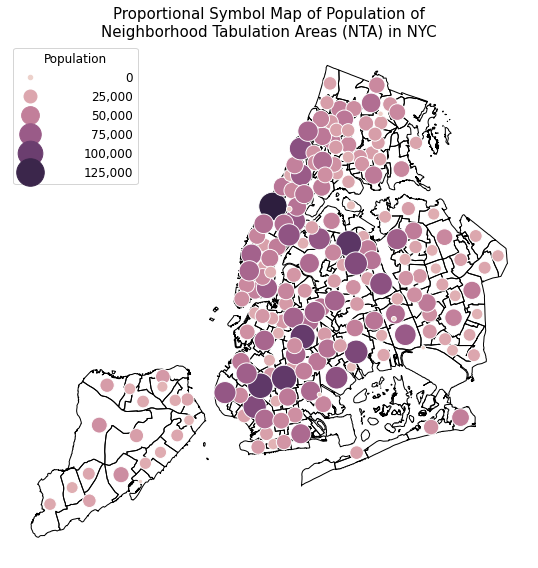

In [107]:
fig, ax = plt.subplots(figsize=(8,8))

ax = sns.scatterplot(x=nta_pop['centroid'].x,
                     y=nta_pop['centroid'].y, 
                     data=nta_pop, 
                     size="Population",
                     hue='Population',
                     sizes=(20, 800))

nta_shape.to_crs(epsg=2263).plot(ax=ax, 
                                 color='None', 
                                 edgecolor='black',
                                 zorder=0)

current_handles, current_labels = plt.gca().get_legend_handles_labels()
       
for i in range(len(current_labels)):
    current_labels[i] = int(current_labels[i])
    current_labels[i] = "{:,}".format((current_labels[i])) 
    

leg = ax.legend(current_handles, current_labels, 
                loc='upper left', 
                fontsize='large', 
                title='Population',  
                title_fontsize=12)

hp = leg._legend_box.get_children()[1]
for vp in hp.get_children():
    for row in vp.get_children():
        row.set_width(115)
        row.mode= "expand"
        row.align="right"

ax.set_title('Proportional Symbol Map of Population of\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=15)
plt.axis('off')
plt.tight_layout()

## 9.5 One-to-One Dot Density Map

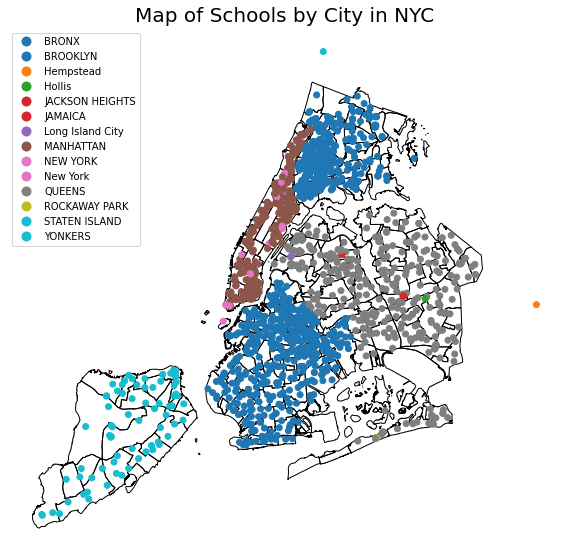

In [108]:
fig, ax = plt.subplots(figsize=(8,8))

school_points.plot(ax=ax, 
                   column='City',
                   legend=True)

nta_shape.to_crs(epsg=2263).plot(ax=ax, 
                                 color='None', 
                                 edgecolor='black',
                                 zorder=0)

ax.set_title('Map of Schools by City in NYC', fontsize=20)
plt.axis('off')
plt.tight_layout()

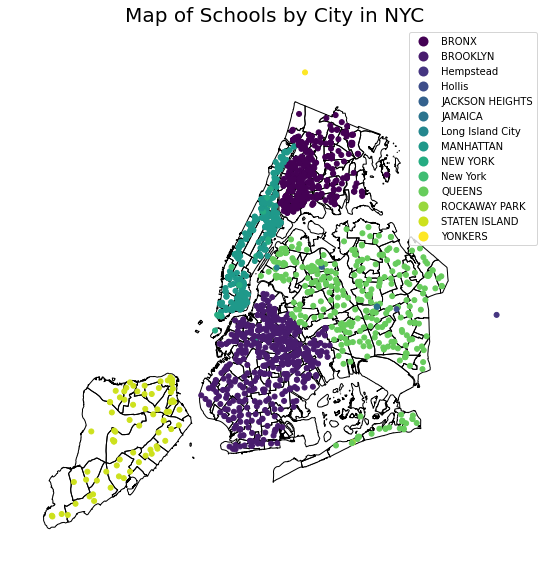

In [109]:
ax = gplt.polyplot(nta_shape.to_crs(4326), 
                   projection=gcrs.AlbersEqualArea(), 
                   figsize=(8,8))

gplt.pointplot(school_points.to_crs(4326),
               hue='City', 
               ax=ax, 
               legend=True,
               zorder=1)

ax.set_title('Map of Schools by City in NYC', fontsize=20)
plt.axis('off')
plt.tight_layout()

## 9.6 One-to-One Dot Density Map with Joint Grids

In [110]:
# creating lat and lon coordinates columns from the geometries 
school_points['lon'] = school_points.to_crs(4326)['geometry'].x
school_points['lat'] = school_points.to_crs(4326)['geometry'].y

school_points.head()

ATS_CODE BORO  BORONUM LOC_CODE              SCHOOLNAME  \
0  15K001          K      2.0     K001     P.S. 001 THE BERGEN   
1  17K002          K      2.0     K002                M.S. 002   
2  21K095          K      2.0     K095  P.S. 095 THE GRAVESEND   
3  21K096          K      2.0     K096       I.S. 096 SETH LOW   
4  21K097          K      2.0     K097    P.S. 97 THE HIGHLAWN   

                          SCH_TYPE  MANAGED_BY  GEO_DISTRI  ADMIN_DIST  \
0                       Elementary           1          15          15   
1  Junior High-Intermediate-Middle           1          17          17   
2                              K-8           1          21          21   
3  Junior High-Intermediate-Middle           1          21          21   
4                       Elementary           1          21          21   

                  ADDRESS  ...               PRINCIPAL       PRIN_PH  \
0           309 47 STREET  ...        Jennifer Eusanio  718-567-7661   
1     655 PARKSIDE AVENUE  ...        ADRIENNE SPENCER  718-462-6992   
2  345 VAN SICKLEN STREET  ...           Janet Ndzibah  718-449-5050   
3             99 AVENUE P  ...  Denise Sandra Levinsky  718-236-1344   
4   1855 STILLWELL AVENUE  ...       KRISTINE MUSTILLO  718-372-7393   

            FAX                            GRADES      City  \
0  718-567-9771           PK,0K,01,02,03,04,05,SE  BROOKLYN   
1  718-284-7717                       06,07,08,SE  BROOKLYN   
2  718-449-3047  PK,0K,01,02,03,04,05,06,07,08,SE  BROOKLYN   
3  718-236-2397                       06,07,08,SE  BROOKLYN   
4  718-372-3842           PK,0K,01,02,03,04,05,SE  BROOKLYN   

                        geometry              x              y        lon  \
0  POINT (980985.054 175780.759)  980985.054171  175780.758994 -74.011766   
1  POINT (997785.136 178431.911)  997785.136430  178431.910832 -73.951218   
2  POINT (991224.983 156323.361)  991224.983006  156323.361213 -73.974884   
3  POINT (988439.681 160709.993)  988439.681361  160709.992624 -73.984911   
4  POINT (988205.073 158329.591)  988205.072910  158329.591337 -73.985757   

         lat  
0  40.649153  
1  40.656420  
2  40.595745  
3  40.607787  
4  40.601253  

[5 rows x 22 columns]

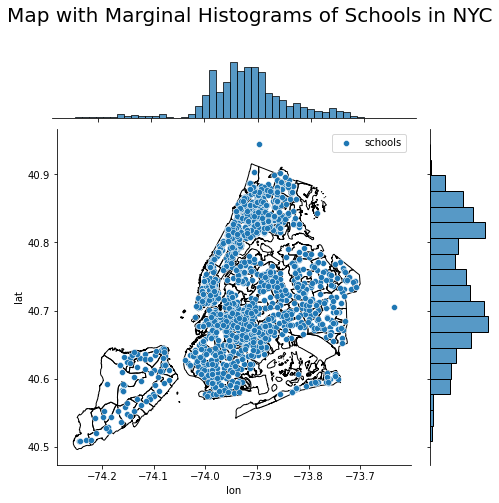

In [111]:
g = sns.jointplot(x='lon',
                  y='lat', 
                  data=school_points,
                  height=7, 
                  label='schools', 
                  legend=True)

nta_shape.to_crs(epsg=4326).plot(ax=g.ax_joint, 
                                 zorder=0, 
                                 color='none', 
                                 edgecolor='black')

g.fig.suptitle("Map with Marginal Histograms of Schools in NYC\n", fontsize=20)
g.fig.subplots_adjust(top=0.95)
plt.tight_layout()

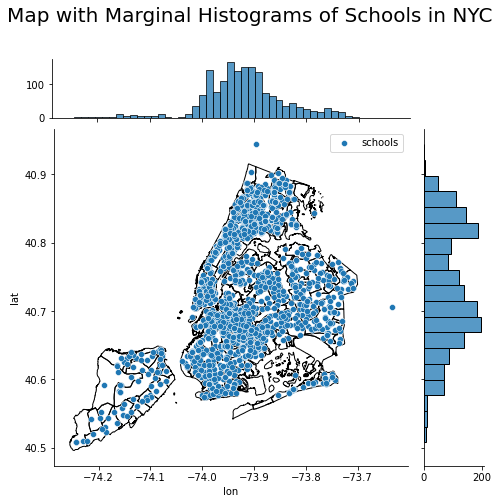

In [112]:
g = sns.jointplot(x='lon',
                  y='lat', 
                  data=school_points,
                  height=7,
                  marginal_ticks=True,
                  label='schools', 
                  legend=True)

nta_shape.to_crs(epsg=4326).plot(ax=g.ax_joint, 
                                 zorder=0, 
                                 color='none', 
                                 edgecolor='black')

g.fig.suptitle("Map with Marginal Histograms of Schools in NYC\n", fontsize=20)
g.fig.subplots_adjust(top=0.95)
plt.tight_layout()

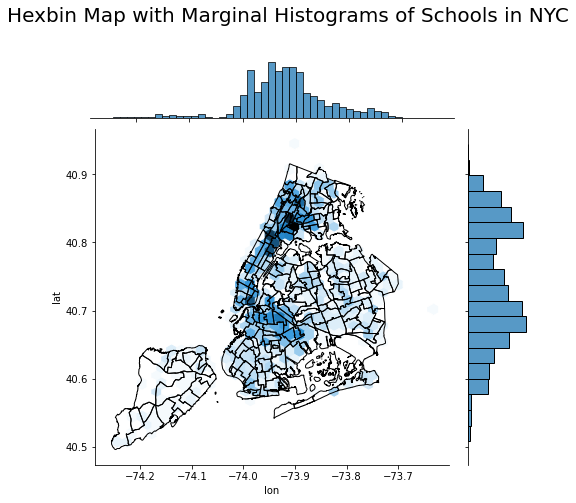

In [113]:
g = sns.jointplot(x='lon',
                  y='lat', 
                  data=school_points,
                  height=7,
                  kind='hex')

nta_shape.to_crs(epsg=4326).plot(ax=g.ax_joint, 
                                 zorder=1, 
                                 color='none', 
                                 edgecolor='black')

g.fig.suptitle("Hexbin Map with Marginal Histograms of Schools in NYC\n", fontsize=20)
g.fig.subplots_adjust(top=0.95)
plt.tight_layout()

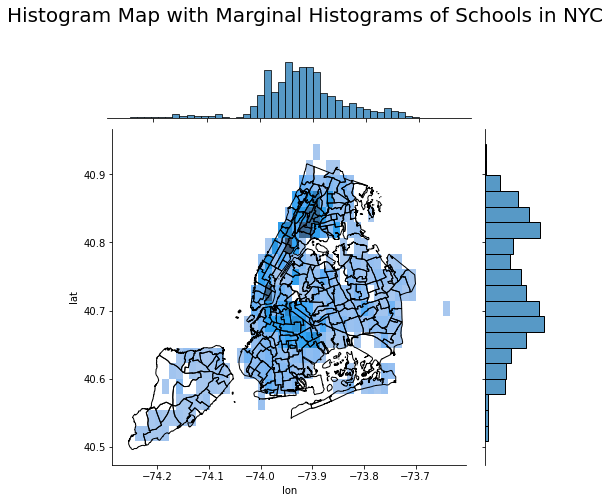

In [114]:
g = sns.jointplot(x='lon',
                  y='lat', 
                  data=school_points,
                  height=7,
                  kind='hist')


nta_shape.to_crs(epsg=4326).plot(ax=g.ax_joint, 
                                 zorder=1, 
                                 color='none', 
                                 edgecolor='black')

g.fig.suptitle("Histogram Map with Marginal Histograms of Schools in NYC\n", fontsize=20)
g.fig.subplots_adjust(top=0.95)
plt.tight_layout()

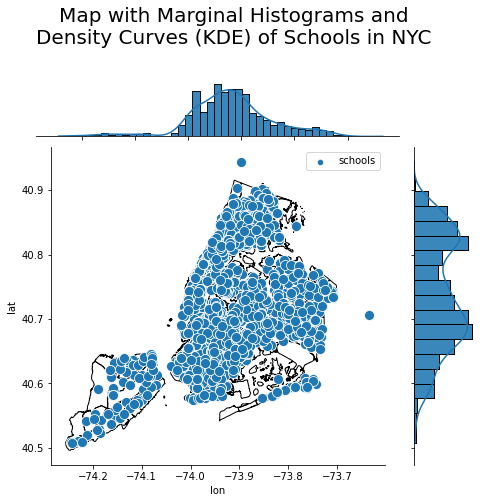

In [115]:
g = sns.jointplot(x='lon',
                  y='lat', 
                  data=school_points,
                  height=7,
                  label='schools', 
                  legend=True)

g.plot_joint(sns.scatterplot, 
             s=100)

g.plot_marginals(sns.histplot, 
                 kde=True)

nta_shape.to_crs(epsg=4326).plot(ax=g.ax_joint, 
                                 zorder=0, 
                                 color='none', 
                                 edgecolor='black')

g.fig.suptitle("Map with Marginal Histograms and\nDensity Curves (KDE) of Schools in NYC\n", fontsize=20)
g.fig.subplots_adjust(top=0.95)
plt.tight_layout()

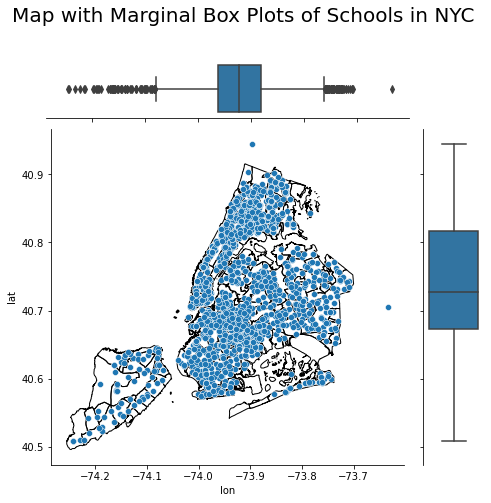

In [116]:
g = sns.JointGrid(x='lon',
                  y='lat', 
                  data=school_points,
                  height=7)

g.plot(sns.scatterplot, 
       sns.boxplot)


nta_shape.to_crs(epsg=4326).plot(ax=g.ax_joint, 
                                 zorder=0, 
                                 color='none', 
                                 edgecolor='black')

g.fig.suptitle("Map with Marginal Box Plots of Schools in NYC\n", fontsize=20)
g.fig.subplots_adjust(top=0.95)
plt.tight_layout()

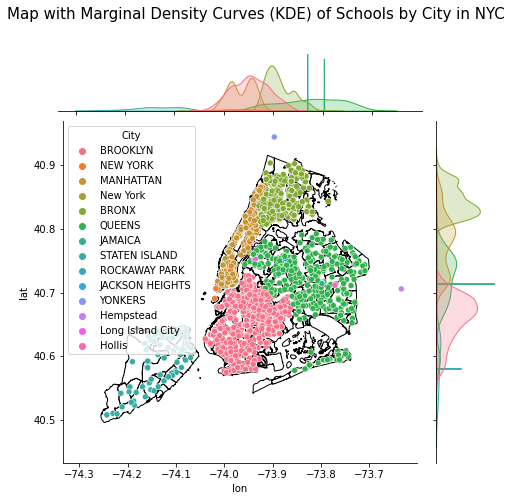

In [117]:
g = sns.jointplot(x='lon',
                  y='lat', 
                  data=school_points,
                  hue='City',
                  height=7)

nta_shape.to_crs(epsg=4326).plot(ax=g.ax_joint, 
                                 zorder=0, 
                                 color='none', 
                                 edgecolor='black')

g.fig.suptitle("Map with Marginal Density Curves (KDE) of Schools by City in NYC\n", fontsize=15)
g.fig.subplots_adjust(top=0.95)
plt.tight_layout()

## 9.7 Cartogram Map

/Users/geribauer/anaconda3/envs/geopandas_env/lib/python3.8/site-packages/geoplot/geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


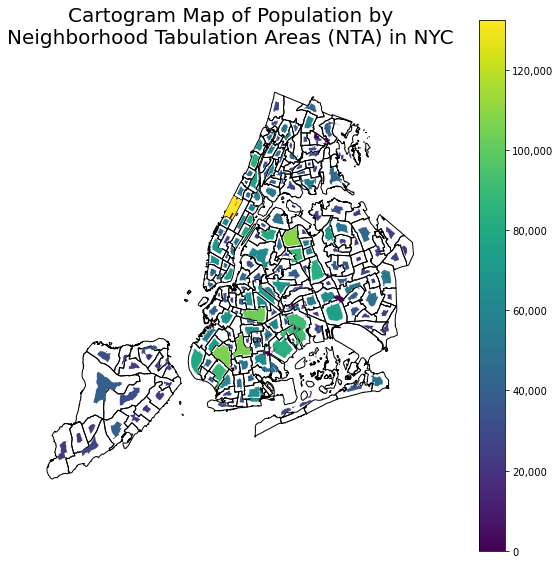

In [118]:
nta_pop = nta_pop.set_geometry('geometry')

comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))

ax = gplt.cartogram(nta_pop.to_crs(4326), 
                    scale='Population', 
                    projection=gcrs.AlbersEqualArea(),
                    figsize=(8,8), 
                    legend=True, 
                    hue='Population',
                    legend_kwargs={'format':comma_fmt})

gplt.polyplot(nta_shape.to_crs(4326), 
              ax=ax, 
              zorder=0)

ax.set_title('Cartogram Map of Population by\nNeighborhood Tabulation Areas (NTA) in NYC', 
             fontsize=20,
             pad=10)
plt.tight_layout()

## 9.8 Voroni Map

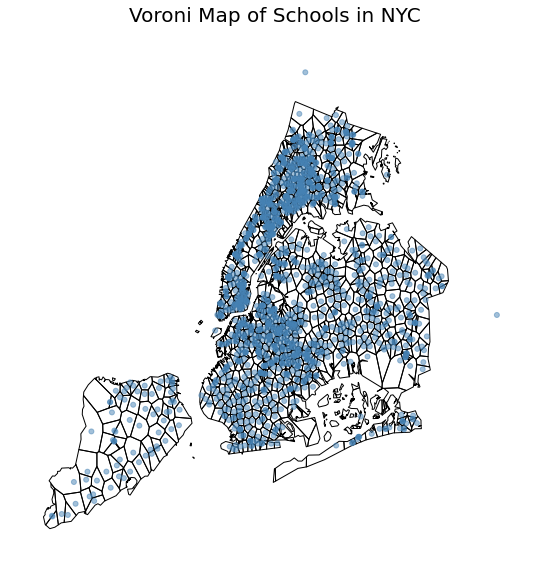

In [119]:
boros = gpd.read_file(gpd.datasets.get_path('nybb'))

ax = gplt.voronoi(school_points.to_crs(4326), 
                  projection=gcrs.AlbersEqualArea(),
                  clip=boros.to_crs(4326).simplify(0.001),
                  figsize=(8,8),
                  zorder=0)

gplt.pointplot(school_points.to_crs(4326), 
               alpha=.5,
               ax=ax)

ax.set_title('Voroni Map of Schools in NYC', fontsize=20)
plt.tight_layout()

## 9.9 Quadtree Map

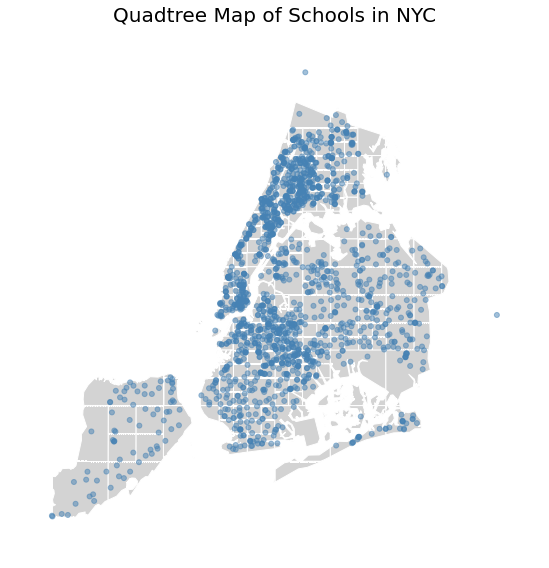

In [120]:
# reading in nyc boros geodataframe
boros = gpd.read_file(gpd.datasets.get_path('nybb'))

ax = gplt.quadtree(school_points.to_crs(4326), 
                   nmax=1,
                   projection=gcrs.AlbersEqualArea(), 
                   
                   # clipping quadtree map to boros shape
                   clip=boros.to_crs(4326).simplify(0.001),
                   facecolor='lightgray', 
                   edgecolor='white', 
                   figsize=(8,8),
                   zorder=0)

gplt.pointplot(school_points.to_crs(4326), 
               alpha=.5,
               ax=ax)

ax.set_title('Quadtree Map of Schools in NYC', fontsize=20)
ax.set_aspect('equal', 'box')
plt.tight_layout()

## 9.10 Aesthetics for Maps

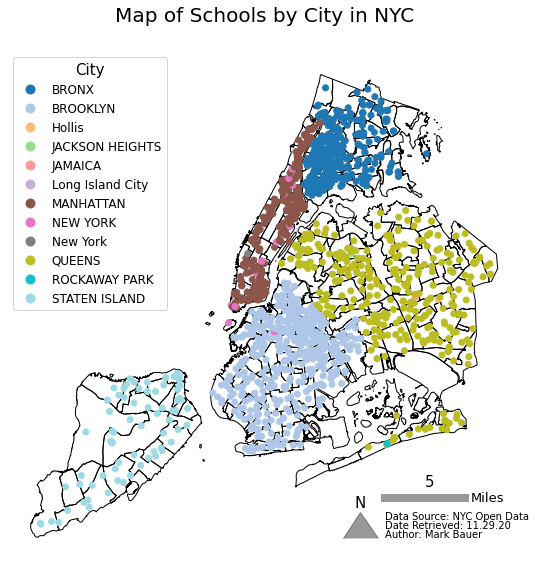

In [121]:
fig, ax = plt.subplots(figsize=(8,8)) # creating figure and axis

# clipping only school points within the five boroughs
school_points_clipped = gpd.clip(school_points, nta_shape.to_crs(epsg=2263))

school_points_clipped.plot(ax=ax, 
                           column='City',
                           cmap='tab20',
                           legend=True,
                           legend_kwds={'loc': "upper left",
                                        'title':'City',
                                        'fontsize': "12",
                                        'title_fontsize':'15'})

nta_shape.to_crs(epsg=2263).plot(ax=ax, 
                                 color='None', 
                                 edgecolor='black',
                                 zorder=0)

# drawing the linke coordinates on the axis
x, y = [1030000, 1030000+5280*5], [120000 + 13000, 120000 + 13000]

# plotting the line
plt.plot(x, 
         y, 
         linewidth=8,
         color='black',
         alpha=.4)

# adding the scale bar text to the line
plt.text(1030000 + (5280*5/2), 120000 + 17000, '5', dict(size=15))
plt.text(1030000+5280*5 + 2000, 120000 + 12000, 'Miles', dict(size=13))

# plotting a triangle to serve as our north arrow
plt.plot([1030000 - 8000], [120000], 
         marker=10, 
         markersize=35, 
         mfc='black', 
         mec='black',
         alpha=.4)

# plotting the letter 'N' above our North Arrow
plt.text(1030000 - 10000, 120000 + 10000, 'N', dict(size=15))

# plotting text that describes our map metadata
plt.text(1030000, 120000 + 6000, 'Data Source: NYC Open Data', dict(size=10))
plt.text(1030000, 120000 + 3000, 'Date Retrieved: 11.29.20', dict(size=10))
plt.text(1030000, 120000, 'Author: Mark Bauer', dict(size=10))

ax.set_title('Map of Schools by City in NYC', pad=30, fontsize=20)
plt.axis('off')
fig.tight_layout()

# 10. Relationship Tests

In [122]:
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)
nta_shape['centroid_column'] = nta_shape.centroid

nta_shape.head()

/var/folders/2_/t32jmn4n7cs9v7ll96cqlmn00000gn/T/ipykernel_9710/2481497955.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nta_shape['centroid_column'] = nta_shape.centroid


ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  \
0    Queens         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...   
1    Queens         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...   
2    Queens         4  MULTIPOLYGON (((-73.77758 40.73019, -73.77849 ...   
3    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...   
4  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...   

              centroid_column  
0  POINT (-73.80955 40.76835)  
1  POINT (-73.86840 40.76335)  
2  POINT (-73.78372 40.73489)  
3  POINT (-73.76315 40.69120)  
4  POINT (-73.96236 40.68797)

In [123]:
# checking if our shape contains its centroid
nta_shape['geometry'].contains(nta_shape['centroid_column']).value_counts()

True     186
False      9
dtype: int64

In [124]:
# checking to see if our centroid is within its shape
nta_shape['centroid_column'].within(nta_shape['geometry']).value_counts()

True     186
False      9
dtype: int64

In [125]:
# checking if our representative point is within its shape
nta_shape.representative_point().within(nta_shape['geometry']).value_counts()

True    195
dtype: int64

In [126]:
# checking to see if our centroid intersects with its shape
nta_shape['centroid_column'].intersects(nta_shape['geometry']).value_counts()

True     186
False      9
dtype: int64

In [127]:
# making a new column called 'within' that identifies if our centroid is within its shape
nta_shape['within'] = nta_shape.centroid_column.within(nta_shape['geometry'])

# printing the shape and head of centroids not within their shapes
print(nta_shape[nta_shape['within'] == False].shape)
nta_shape[nta_shape['within'] == False].head()

(9, 10)


ntacode     shape_area county_fips  \
58     SI37  46426790.7335         085   
96     SI22  56028570.7705         085   
114    MN99  91499473.5163         061   
131    QN10  99604665.5407         081   
136    BX10  40226289.5119         005   

                                               ntaname     shape_leng  \
58                                  Stapleton-Rosebank  55229.6374031   
96           West New Brighton-New Brighton-St. George  66052.5937578   
114                        park-cemetery-etc-Manhattan  155290.452804   
131  Breezy Point-Belle Harbor-Rockaway Park-Broad ...   114641.36345   
136                Pelham Bay-Country Club-City Island  138682.031059   

         boro_name boro_code  \
58   Staten Island         5   
96   Staten Island         5   
114      Manhattan         1   
131         Queens         4   
136          Bronx         2   

                                              geometry  \
58   MULTIPOLYGON (((-74.07258 40.63794, -74.07257 ...   
96   MULTIPOLYGON (((-74.07258 40.63794, -74.07330 ...   
114  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...   
131  MULTIPOLYGON (((-73.88347 40.56848, -73.88337 ...   
136  MULTIPOLYGON (((-73.78833 40.83467, -73.78931 ...   

                centroid_column  within  
58   POINT (-74.07371 40.61873)   False  
96   POINT (-74.10231 40.63897)   False  
114  POINT (-73.95480 40.78794)   False  
131  POINT (-73.87647 40.57148)   False  
136  POINT (-73.80649 40.84660)   False

In [128]:
# returning the count of unique values of centroids not within their shapes
nta_shape[nta_shape['within'] == False]['ntaname'].value_counts()

Stapleton-Rosebank                                       1
West New Brighton-New Brighton-St. George                1
park-cemetery-etc-Manhattan                              1
Breezy Point-Belle Harbor-Rockaway Park-Broad Channel    1
Pelham Bay-Country Club-City Island                      1
Eastchester-Edenwald-Baychester                          1
park-cemetery-etc-Brooklyn                               1
park-cemetery-etc-Queens                                 1
park-cemetery-etc-Bronx                                  1
Name: ntaname, dtype: int64

In [129]:
# saving centroids that are not within their shapes as a new dataframe called 'multi_shapes'
multi_shapes = nta_shape[nta_shape['within'] == False]

multi_shapes[['ntaname', 'geometry']]

ntaname  \
58                                  Stapleton-Rosebank   
96           West New Brighton-New Brighton-St. George   
114                        park-cemetery-etc-Manhattan   
131  Breezy Point-Belle Harbor-Rockaway Park-Broad ...   
136                Pelham Bay-Country Club-City Island   
166                    Eastchester-Edenwald-Baychester   
177                         park-cemetery-etc-Brooklyn   
182                           park-cemetery-etc-Queens   
186                            park-cemetery-etc-Bronx   

                                              geometry  
58   MULTIPOLYGON (((-74.07258 40.63794, -74.07257 ...  
96   MULTIPOLYGON (((-74.07258 40.63794, -74.07330 ...  
114  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
131  MULTIPOLYGON (((-73.88347 40.56848, -73.88337 ...  
136  MULTIPOLYGON (((-73.78833 40.83467, -73.78931 ...  
166  MULTIPOLYGON (((-73.79323 40.88282, -73.79417 ...  
177  MULTIPOLYGON (((-73.91513 40.58627, -73.91510 ...  
182  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
186  MULTIPOLYGON (((-73.86956 40.81616, -73.86954 ...

In [130]:
multi_shapes = multi_shapes.to_crs(2263)

# Returns the union of the shape and their centroids to plot together.
multi_shapes.centroid.union(multi_shapes['geometry'])

58     GEOMETRYCOLLECTION (POLYGON ((964108.221 17167...
96     GEOMETRYCOLLECTION (POLYGON ((963907.107 17169...
114    GEOMETRYCOLLECTION (POLYGON ((980940.486 18843...
131    GEOMETRYCOLLECTION (POLYGON ((1016653.398 1463...
136    GEOMETRYCOLLECTION (POLYGON ((1042551.823 2433...
166    GEOMETRYCOLLECTION (POLYGON ((1041167.248 2610...
177    GEOMETRYCOLLECTION (POLYGON ((1007832.158 1528...
182    GEOMETRYCOLLECTION (POLYGON ((970227.278 14564...
186    GEOMETRYCOLLECTION (POLYGON ((1020359.713 2366...
dtype: geometry

# Identifying centroids not located within their shape

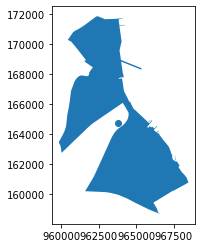

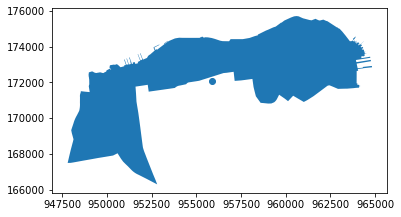

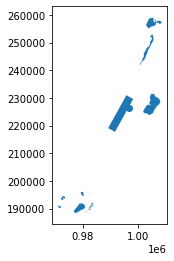

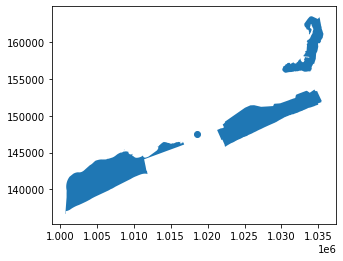

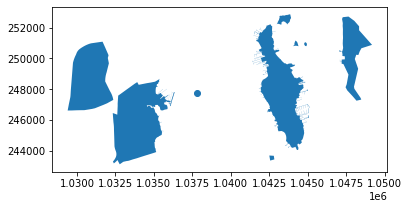

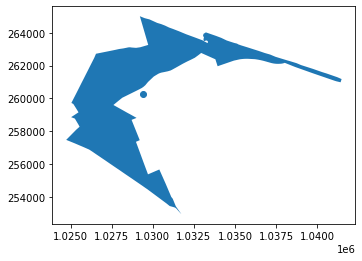

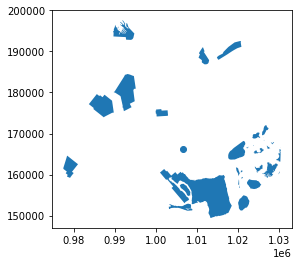

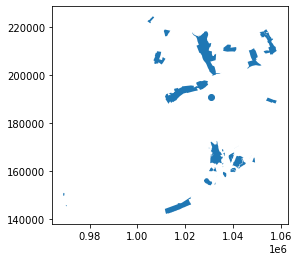

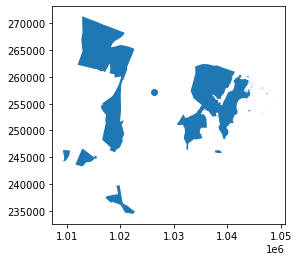

In [131]:
# saving the shape, centroid union as a new name called 'multi_shapes'
multi_shapes = multi_shapes.centroid.union(multi_shapes['geometry'])

# plotting the shapes and their centroids that do not fall within their shape
for i in range(len(multi_shapes)):
    multi_shapes.iloc[[i]].plot()

# 11. Set Operations with Overlay

In [132]:
# reading in nta data
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
1    Queens         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
2    Queens         4  MULTIPOLYGON (((-73.77758 40.73019, -73.77849 ...  
3    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
4  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...

In [133]:
# offsetting the nta data 10,000 feet east and north so we can perform overlay operations
# saving as a new column called 'offset'
nta_shape = nta_shape.to_crs(epsg=2263)
nta_shape['offset'] = nta_shape.geometry.translate(10000, 10000)

nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  \
0    Queens         4  MULTIPOLYGON (((1038593.497 221913.624, 103936...   
1    Queens         4  MULTIPOLYGON (((1022728.281 217531.059, 102305...   
2    Queens         4  MULTIPOLYGON (((1045896.235 205384.223, 104564...   
3    Queens         4  MULTIPOLYGON (((1052996.196 196307.658, 105308...   
4  Brooklyn         3  MULTIPOLYGON (((997183.302 187255.730, 997207....   

                                              offset  
0  MULTIPOLYGON (((1048593.497 231913.624, 104936...  
1  MULTIPOLYGON (((1032728.281 227531.059, 103305...  
2  MULTIPOLYGON (((1055896.235 215384.223, 105564...  
3  MULTIPOLYGON (((1062996.196 206307.658, 106308...  
4  MULTIPOLYGON (((1007183.302 197255.730, 100720...

Text(0.5, 1.0, 'Offset = 10,000 ft in both x and y directions')

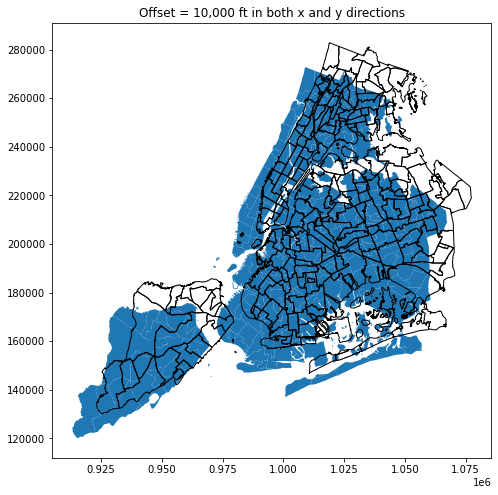

In [134]:
# previewing the new offset shape
fig, ax = plt.subplots(figsize=(8,8))

nta_shape.plot(ax=ax)

nta_shape.set_geometry('offset').plot(ax=ax,
                                      color='none',
                                      edgecolor='black')

ax.set_title('Offset = 10,000 ft in both x and y directions')

<AxesSubplot:>

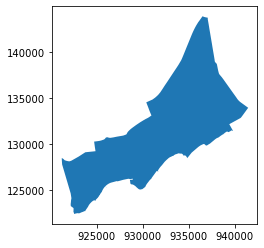

In [135]:
# we will use this nta shape to analyze overlay methods
nta_shape[nta_shape['ntacode'] == 'SI01'].plot()

In [136]:
nta_shape = nta_shape[nta_shape['ntacode'] == 'SI01']
nta_shape.head()

ntacode     shape_area county_fips  \
123    SI01  141191279.356         085   

                                        ntaname     shape_leng      boro_name  \
123  Annadale-Huguenot-Prince's Bay-Eltingville  71312.1637257  Staten Island   

    boro_code                                           geometry  \
123         5  MULTIPOLYGON (((925914.571 130614.869, 925948....   

                                                offset  
123  MULTIPOLYGON (((935914.571 140614.869, 935948....

In [137]:
offset = nta_shape.set_geometry('offset')
offset.head()

ntacode     shape_area county_fips  \
123    SI01  141191279.356         085   

                                        ntaname     shape_leng      boro_name  \
123  Annadale-Huguenot-Prince's Bay-Eltingville  71312.1637257  Staten Island   

    boro_code                                           geometry  \
123         5  MULTIPOLYGON (((925914.571 130614.869, 925948....   

                                                offset  
123  MULTIPOLYGON (((935914.571 140614.869, 935948....

Text(0.5, 1.0, 'Overlay = None (Original Shapes)')

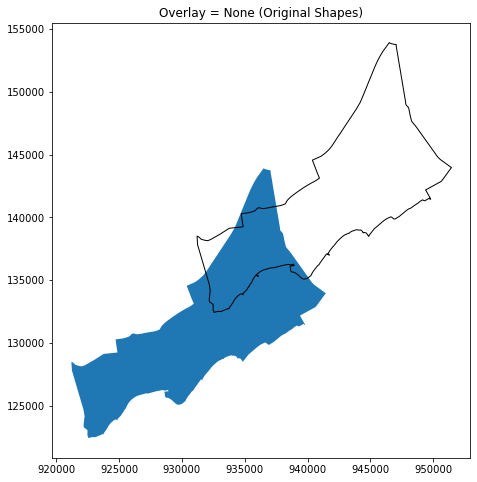

In [138]:
fig, ax = plt.subplots(figsize=(8,8))

nta_shape.plot(ax=ax)

offset.plot(ax=ax, color='None', edgecolor='black')
ax.set_title('Overlay = None (Original Shapes)')

## 11.1 Union

Text(0.5, 1.0, 'Overlay = Union')

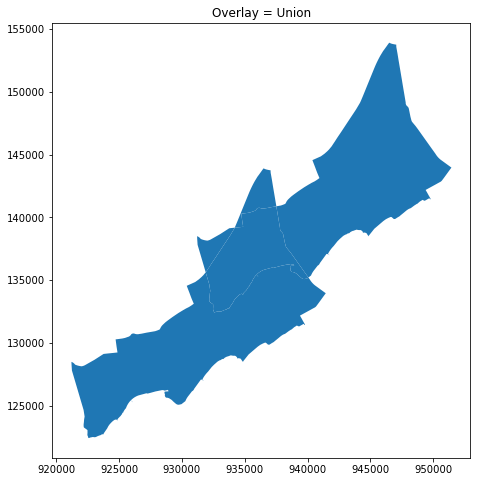

In [139]:
fig, ax = plt.subplots(figsize=(8,8))

# analyzing union overlay method
union = gpd.overlay(nta_shape, offset, how='union')
union.plot(ax=ax)
ax.set_title('Overlay = Union')

## 11.2 Intersection

Text(0.5, 1.0, 'Overlay = Intersection')

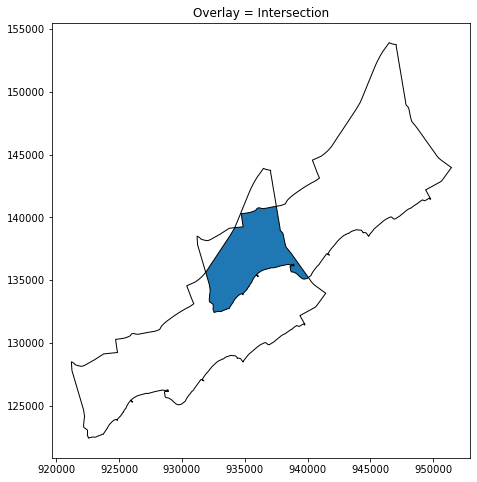

In [140]:
fig, ax = plt.subplots(figsize=(8,8))

# analyzing the intersection overlay method
intersection = gpd.overlay(nta_shape, offset, how='intersection')
intersection.plot(ax=ax)
offset.plot(ax=ax, color='None', edgecolor='black')
nta_shape.plot(ax=ax, color='None',  edgecolor='black')
ax.set_title('Overlay = Intersection')

## 11.3 Symmetric Difference

Text(0.5, 1.0, 'Overlay = Symmetric Difference')

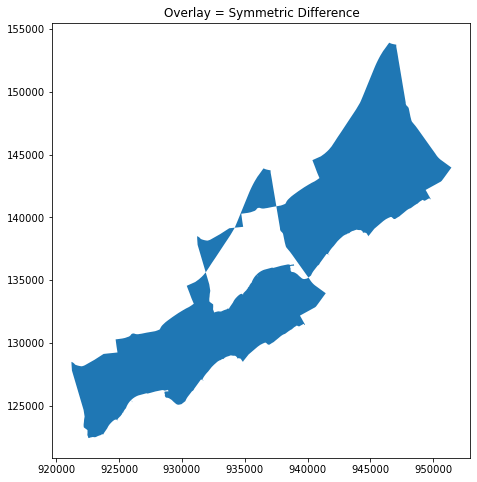

In [141]:
fig, ax = plt.subplots(figsize=(8,8))

# analyzing the symmetric_difference overlay method
symmetric_difference = gpd.overlay(nta_shape, offset, how='symmetric_difference')
symmetric_difference.plot(ax=ax)
ax.set_title('Overlay = Symmetric Difference')

## 11.4 Difference

Text(0.5, 1.0, 'Overlay = Difference')

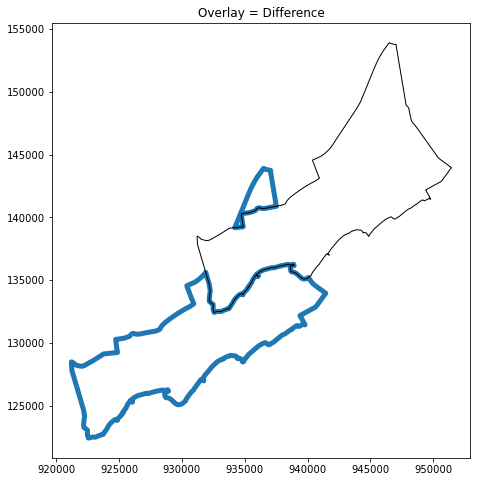

In [142]:
fig, ax = plt.subplots(figsize=(8,8)) # creating a figure

# analyzing the difference overlay method
difference = gpd.overlay(nta_shape, offset, how='difference')
difference.plot(ax=ax, color='None', edgecolor='#1f77b4', linewidth=5)
offset.plot(ax=ax, color='None', edgecolor='black', zorder=1)
ax.set_title('Overlay = Difference')

## 11.5 Identity

Text(0.5, 1.0, 'Overlay = Identity')

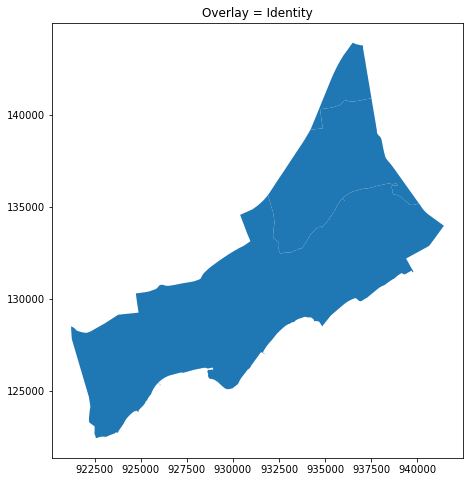

In [143]:
fig, ax = plt.subplots(figsize=(8,8))

# analyzing the identity overlay method
identity = gpd.overlay(nta_shape, offset, how='identity')
identity.plot(ax=ax)
ax.set_title('Overlay = Identity')

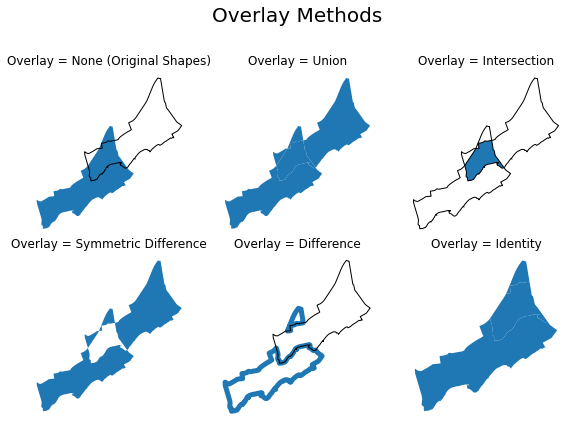

In [144]:
# plotting overlay methods
fig, axs = plt.subplots(2, 3, sharey=False, figsize=(8,6))

nta_shape.plot(ax=axs[0, 0])
offset.plot(ax=axs[0, 0], color='None', edgecolor='black')
axs[0, 0].set_title('Overlay = None (Original Shapes)')
axs[0, 0].axis('off')

union = gpd.overlay(nta_shape, offset, how='union')
union.plot(ax=axs[0, 1])
axs[0, 1].set_title('Overlay = Union')
axs[0, 1].axis('off')

intersection = gpd.overlay(nta_shape, offset, how='intersection')
intersection.plot(ax=axs[0, 2])
offset.plot(ax=axs[0, 2], color='None', edgecolor='black')
nta_shape.plot(ax=axs[0, 2], color='None',  edgecolor='black')
axs[0, 2].set_title('Overlay = Intersection')
axs[0, 2].axis('off')

symmetric_difference = gpd.overlay(nta_shape, offset, how='symmetric_difference')
symmetric_difference.plot(ax=axs[1, 0])
axs[1, 0].set_title('Overlay = Symmetric Difference')
axs[1, 0].axis('off')

difference = gpd.overlay(nta_shape, offset, how='difference')
difference.plot(ax=axs[1, 1], color='None', edgecolor='#1f77b4', linewidth=5)
offset.plot(ax=axs[1, 1], color='None', edgecolor='black', zorder=1)
axs[1, 1].set_title('Overlay = Difference')
axs[1, 1].axis('off')

identity = gpd.overlay(nta_shape, offset, how='identity')
identity.plot(ax=axs[1, 2])
axs[1, 2].set_title('Overlay = Identity')
axs[1, 2].axis('off')

fig.suptitle("Overlay Methods\n", fontsize=20)
fig.tight_layout()

## 11.6 Aggregation with Dissolve

In [145]:
# reading in nta data
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((-73.80379 40.77561, -73.80099 ...  
1    Queens         4  MULTIPOLYGON (((-73.86110 40.76366, -73.85993 ...  
2    Queens         4  MULTIPOLYGON (((-73.77758 40.73019, -73.77849 ...  
3    Queens         4  MULTIPOLYGON (((-73.75205 40.70523, -73.75174 ...  
4  Brooklyn         3  MULTIPOLYGON (((-73.95337 40.68064, -73.95328 ...

<AxesSubplot:>

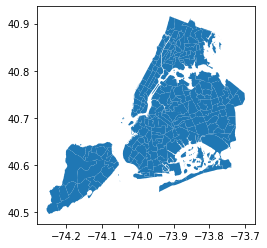

In [146]:
nta_shape.plot()

In [147]:
# dissolving nta shapes by borough
boro = nta_shape.dissolve(by='boro_name')
boro.head()

geometry ntacode  \
boro_name                                                                  
Bronx          MULTIPOLYGON (((-73.89919 40.79650, -73.89852 ...    BX28   
Brooklyn       MULTIPOLYGON (((-73.96081 40.57386, -73.96091 ...    BK69   
Manhattan      MULTIPOLYGON (((-74.00860 40.68625, -74.00835 ...    MN12   
Queens         MULTIPOLYGON (((-73.88307 40.56838, -73.88305 ...    QN51   
Staten Island  MULTIPOLYGON (((-74.22211 40.50260, -74.22217 ...    SI32   

                  shape_area county_fips                ntaname  \
boro_name                                                         
Bronx          25666124.8994         005  Van Cortlandt Village   
Brooklyn       20528197.0269         047           Clinton Hill   
Manhattan      34379942.2944         061        Upper West Side   
Queens         52488277.4492         081            Murray Hill   
Staten Island  64963357.7696         085      Rossville-Woodrow   

                  shape_leng boro_code  
boro_name                               
Bronx          21945.7196947         2  
Brooklyn       23971.4662361         3  
Manhattan       29160.206256         1  
Queens         33266.9048559         4  
Staten Island  33247.2577048         5

<AxesSubplot:>

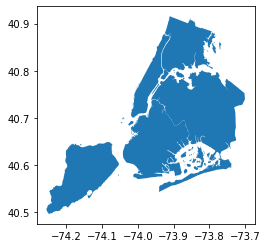

In [148]:
boro.plot()

# 12. Additional Attributes and Methods

## 12.1 Unary Predicates

In [149]:
nta_shape.geometry.is_empty.value_counts()

False    195
dtype: int64

In [150]:
nta_shape.geometry.isna().value_counts()

False    195
Name: geometry, dtype: int64

In [151]:
nta_shape['geometry'].is_simple.value_counts()

True    195
dtype: int64

## 12.2 Binary Predicates

In [152]:
# reading in nta data
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape = nta_shape.to_crs(epsg=2263)
nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((1038593.497 221913.624, 103936...  
1    Queens         4  MULTIPOLYGON (((1022728.281 217531.059, 102305...  
2    Queens         4  MULTIPOLYGON (((1045896.235 205384.223, 104564...  
3    Queens         4  MULTIPOLYGON (((1052996.196 196307.658, 105308...  
4  Brooklyn         3  MULTIPOLYGON (((997183.302 187255.730, 997207....

### 12.2.1 Centroids vs. Representative Points

In [153]:
nta_shape.centroid.geom_almost_equals(nta_shape.centroid).value_counts()

True    195
dtype: int64

In [154]:
# an nta's shape centroid does not equal their representative point
nta_shape.centroid.geom_almost_equals(nta_shape.representative_point()).value_counts()

False    195
dtype: int64

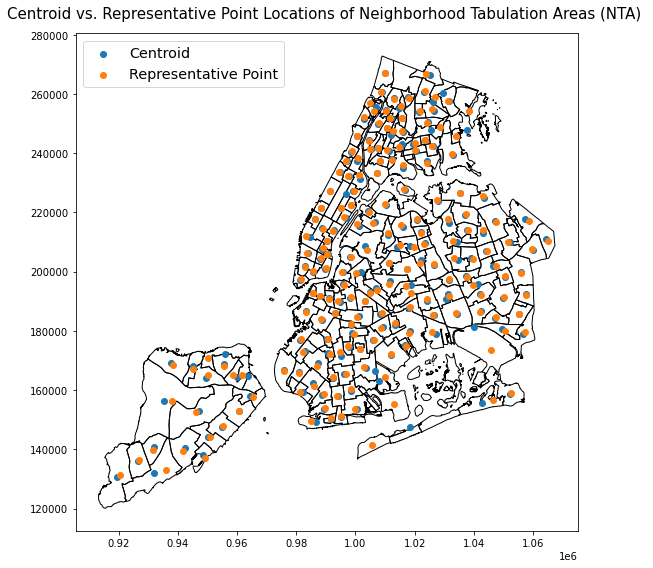

In [155]:
fig, ax = plt.subplots(figsize=(8,8)) # creating a figure

nta_shape.plot(ax=ax, 
               color='none', 
               edgecolor='black')

nta_shape.centroid.plot(ax=ax, 
                        label='Centroid')

nta_shape.representative_point().plot(ax=ax, 
                                      label='Representative Point')

ax.legend(loc=2, fontsize='x-large')
ax.set_title('Centroid vs. Representative Point Locations of Neighborhood Tabulation Areas (NTA) ', 
             fontsize=15,
             pad=15)
ax.set_aspect('equal', 'box')
fig.tight_layout()

In [156]:
nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((1038593.497 221913.624, 103936...  
1    Queens         4  MULTIPOLYGON (((1022728.281 217531.059, 102305...  
2    Queens         4  MULTIPOLYGON (((1045896.235 205384.223, 104564...  
3    Queens         4  MULTIPOLYGON (((1052996.196 196307.658, 105308...  
4  Brooklyn         3  MULTIPOLYGON (((997183.302 187255.730, 997207....

In [157]:
# offsetting the nta shapes by 10,000 feet in north and east directions
nta_shape['offset'] = nta_shape.geometry.translate(10000, 10000)
nta_shape['centroid_column'] = nta_shape.centroid

nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  \
0    Queens         4  MULTIPOLYGON (((1038593.497 221913.624, 103936...   
1    Queens         4  MULTIPOLYGON (((1022728.281 217531.059, 102305...   
2    Queens         4  MULTIPOLYGON (((1045896.235 205384.223, 104564...   
3    Queens         4  MULTIPOLYGON (((1052996.196 196307.658, 105308...   
4  Brooklyn         3  MULTIPOLYGON (((997183.302 187255.730, 997207....   

                                              offset  \
0  MULTIPOLYGON (((1048593.497 231913.624, 104936...   
1  MULTIPOLYGON (((1032728.281 227531.059, 103305...   
2  MULTIPOLYGON (((1055896.235 215384.223, 105564...   
3  MULTIPOLYGON (((1062996.196 206307.658, 106308...   
4  MULTIPOLYGON (((1007183.302 197255.730, 100720...   

                  centroid_column  
0  POINT (1037005.260 219265.588)  
1  POINT (1020706.747 217414.118)  
2  POINT (1044189.872 207092.732)  
3  POINT (1049933.729 191188.768)  
4   POINT (994687.841 189923.623)

Text(0.5, 1.0, 'Offset of 10,000 ft in both x and y directions')

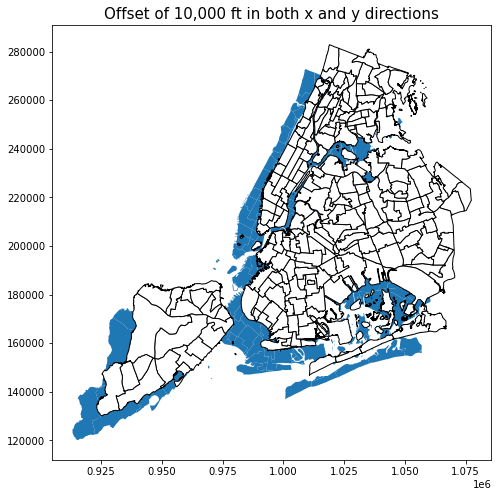

In [158]:
fig, ax = plt.subplots(figsize=(8,8)) 

nta_shape.plot(ax=ax, 
               label='original')

nta_shape.set_geometry('offset').plot(ax=ax,
                                      color='white',
                                      edgecolor='black', 
                                      label='offset')

ax.set_title('Offset of 10,000 ft in both x and y directions', fontsize=15)

## 12.4 Constructive Methods

In [159]:
# reading in nta shape data
url = 'https://data.cityofnewyork.us/api/geospatial/cpf4-rkhq?method=export&format=GeoJSON'
nta_shape = gpd.read_file(url)

nta_shape.to_crs(epsg=2263, inplace=True)
nta_shape.head()

ntacode     shape_area county_fips               ntaname     shape_leng  \
0    QN51  52488277.4492         081           Murray Hill  33266.9048559   
1    QN27   19726845.734         081         East Elmhurst  19816.7117581   
2    QN41  27774853.5522         081  Fresh Meadows-Utopia  22106.4312724   
3    QN08  77412747.8943         081            St. Albans  45401.3167856   
4    BK69  20528197.0269         047          Clinton Hill  23971.4662361   

  boro_name boro_code                                           geometry  
0    Queens         4  MULTIPOLYGON (((1038593.497 221913.624, 103936...  
1    Queens         4  MULTIPOLYGON (((1022728.281 217531.059, 102305...  
2    Queens         4  MULTIPOLYGON (((1045896.235 205384.223, 104564...  
3    Queens         4  MULTIPOLYGON (((1052996.196 196307.658, 105308...  
4  Brooklyn         3  MULTIPOLYGON (((997183.302 187255.730, 997207....

### 12.4.1 Buffer

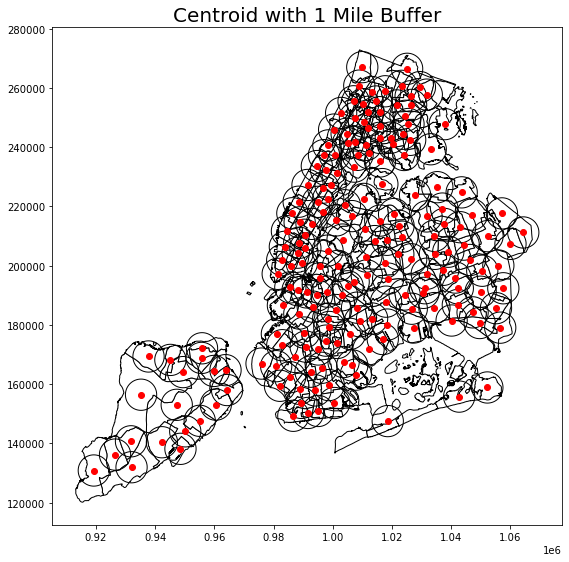

In [160]:
fig, ax = plt.subplots(figsize=(8,8)) # creating a figure

# plotting a one mile radius buffer of the nta centroid
nta_shape.centroid.buffer(5280).plot(ax=ax, 
                                     color='none', 
                                     edgecolor='black')

nta_shape.centroid.plot(ax=ax, 
                        color='red', 
                        edgecolor='red')

nta_shape.plot(ax=ax, 
               color='white', 
               edgecolor='black', 
               zorder=0)

ax.set_title('Centroid with 1 Mile Buffer', fontsize=20)
ax.set_aspect('equal', 'box')
fig.tight_layout()

### 12.4.2 Convex Hull

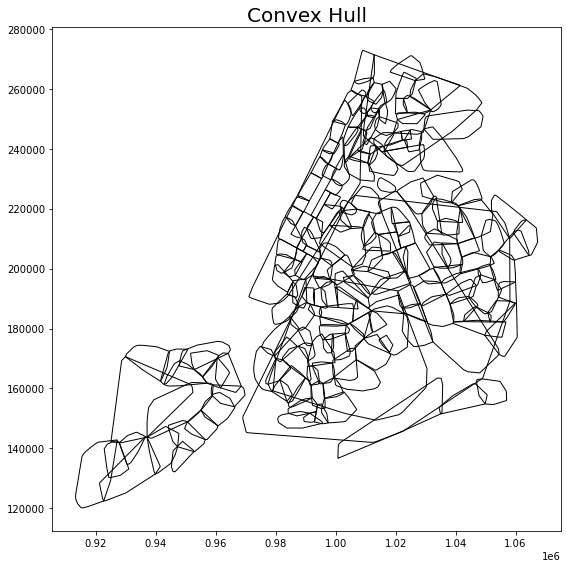

In [161]:
fig, ax = plt.subplots(figsize=(8,8)) 

# Returns a ``GeoSeries`` of geometries representing the convex hull
# of each geometry.

# The convex hull of a geometry is the smallest convex `Polygon`
# containing all the points in each geometry, unless the number of points
# in the geometric object is less than three. For two points, the convex
# hull collapses to a `LineString`; for 1, a `Point`.

nta_shape['geometry'].convex_hull.plot(ax=ax, 
                                       color='none', 
                                       edgecolor='black')

ax.set_title('Convex Hull', fontsize=20)
ax.set_aspect('equal', 'box')
fig.tight_layout()

### 12.4.3 Envelope

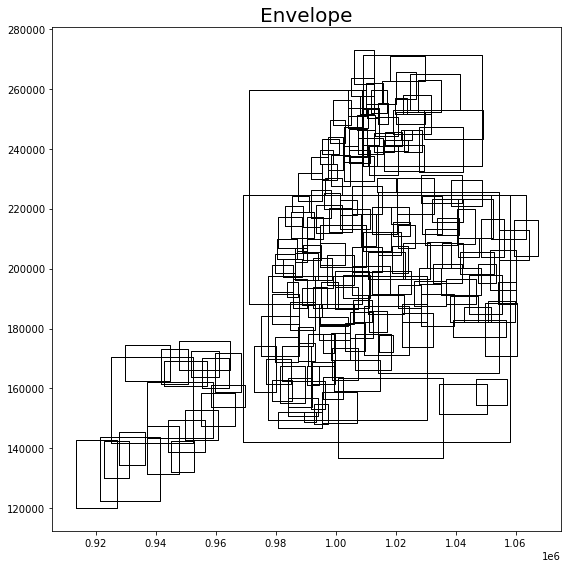

In [162]:
fig, ax = plt.subplots(figsize=(8,8)) 

# Returns a ``GeoSeries`` of geometries representing the envelope of
# each geometry.

# The envelope of a geometry is the bounding rectangle. That is, the
# point or smallest rectangular polygon (with sides parallel to the
# coordinate axes) that contains the geometry.

nta_shape['geometry'].envelope.plot(ax=ax, 
                                    color='none', 
                                    edgecolor='black')

ax.set_title('Envelope', fontsize=20)
ax.set_aspect('equal', 'box')
fig.tight_layout()

### 12.4.4 Simplify

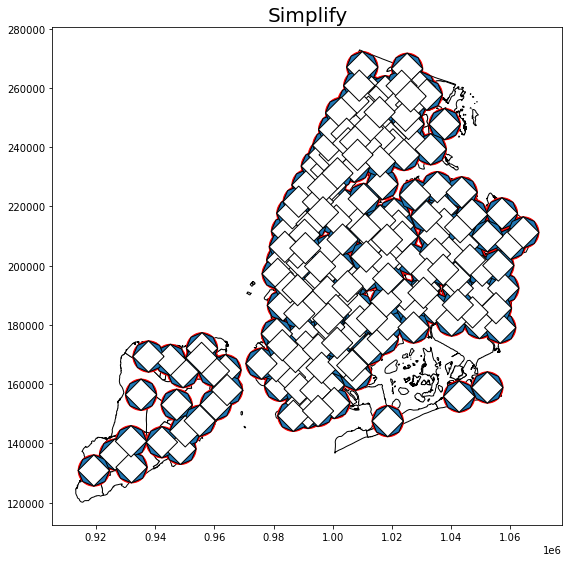

In [163]:
fig, ax = plt.subplots(figsize=(8,8))

nta_shape.centroid.buffer(5280).plot(ax=ax, 
                                     color='red', 
                                     edgecolor='red')

nta_shape.centroid.buffer(5280).simplify(1000).plot(ax=ax, 
                                                    edgecolor='black')

nta_shape.centroid.buffer(5280).simplify(10000).plot(ax=ax, 
                                                     color='white', 
                                                     edgecolor='black')

nta_shape.plot(ax=ax, 
               color='white', 
               edgecolor='black',
               zorder=0)

ax.set_title('Simplify', fontsize=20)
ax.set_aspect('equal', 'box')
fig.tight_layout()

## 12.5 Affine Transformations

### 12.5.1 Rotate

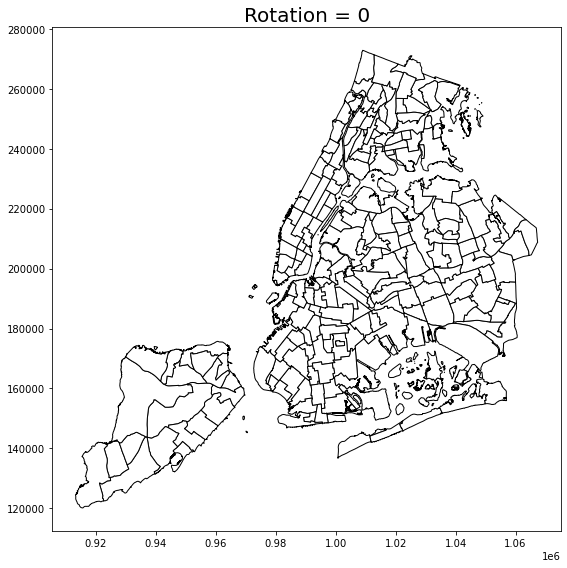

In [164]:
fig, ax = plt.subplots(figsize=(8,8))

# rotate the nta shapes 0 degrees.
nta_shape.rotate(0).plot(ax=ax, 
                         color='white', 
                         edgecolor='black')

ax.set_title('Rotation = 0', fontsize=20)
ax.set_aspect('equal', 'box')
fig.tight_layout()

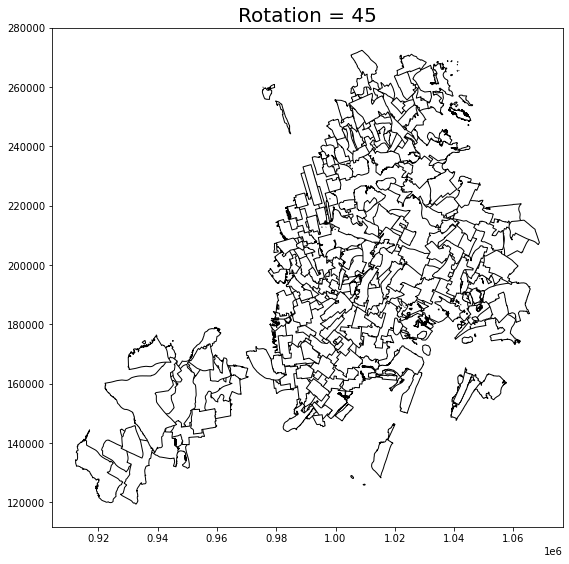

In [165]:
fig, ax = plt.subplots(figsize=(8,8))

# rotate the nta shapes 45 degrees.
nta_shape.rotate(45).plot(ax=ax, 
                          color='white', 
                          edgecolor='black')

ax.set_title('Rotation = 45', fontsize=20)
ax.set_aspect('equal', 'box')
fig.tight_layout()

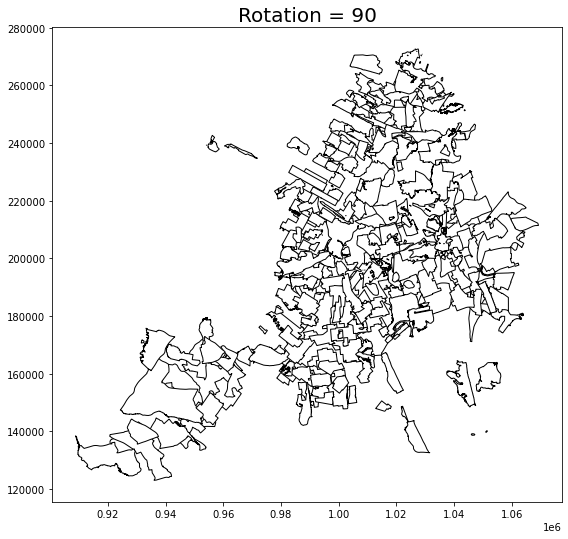

In [166]:
fig, ax = plt.subplots(figsize=(8,8))


# rotate the nta shapes 90 degrees.
nta_shape.rotate(90).plot(ax=ax, 
                          color='white', 
                          edgecolor='black')

ax.set_title('Rotation = 90', fontsize=20)
ax.set_aspect('equal', 'box')
fig.tight_layout()

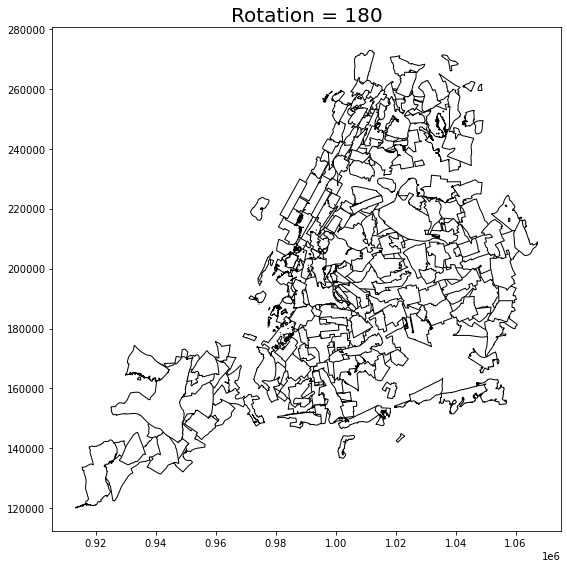

In [167]:
fig, ax = plt.subplots(figsize=(8,8))

# rotate the nta shapes 180 degrees.
nta_shape.rotate(180).plot(ax=ax, 
                           color='white', 
                           edgecolor='black')

ax.set_title('Rotation = 180', fontsize=20)
ax.set_aspect('equal', 'box')
fig.tight_layout()

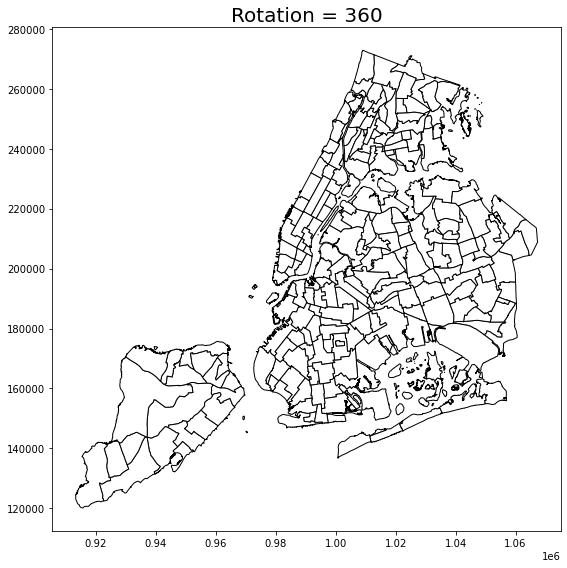

In [168]:
fig, ax = plt.subplots(figsize=(8,8))

# rotate the nta shapes 360 degrees
nta_shape.rotate(360).plot(ax=ax, 
                           color='white', 
                           edgecolor='black')

ax.set_title('Rotation = 360', fontsize=20)
ax.set_aspect('equal', 'box')
fig.tight_layout()

### 12.5.2 Scale

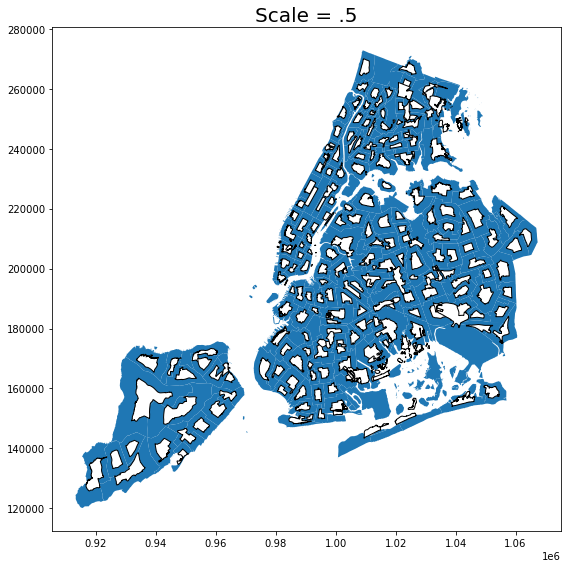

In [169]:
fig, ax = plt.subplots(figsize=(8,8))

# Returns a ``GeoSeries`` with scaled geometries.

# The geometries can be scaled by different factors along each
# dimension. Negative scale factors will mirror or reflect coordinates.

nta_shape.scale(xfact=.5, yfact=.5).plot(ax=ax, 
                                         color='white', 
                                         edgecolor='black')

nta_shape.plot(ax=ax, 
               zorder=0)

ax.set_title('Scale = .5', fontsize=20)
ax.set_aspect('equal', 'box')
fig.tight_layout()

### 12.5.3 Skew

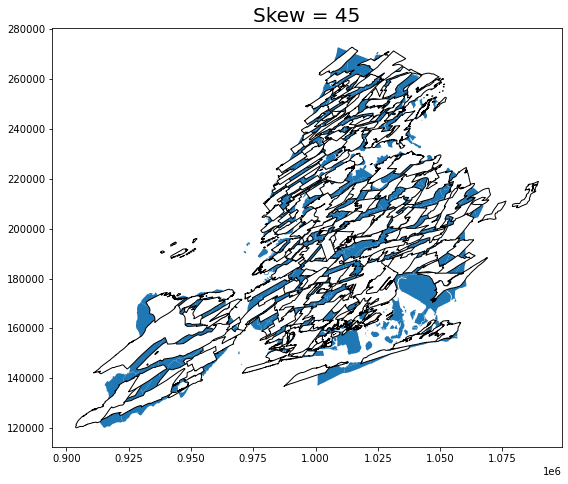

In [170]:
fig, ax = plt.subplots(figsize=(8,8))

# The geometries are sheared by angles along the x and y dimensions.

nta_shape.skew(45).plot(ax=ax, 
                        color='white', 
                        edgecolor='black')

nta_shape.plot(ax=ax, 
               zorder=0)

ax.set_title('Skew = 45', fontsize=20)
ax.set_aspect('equal', 'box')
fig.tight_layout()

### 12.5.4 Translate/Offset

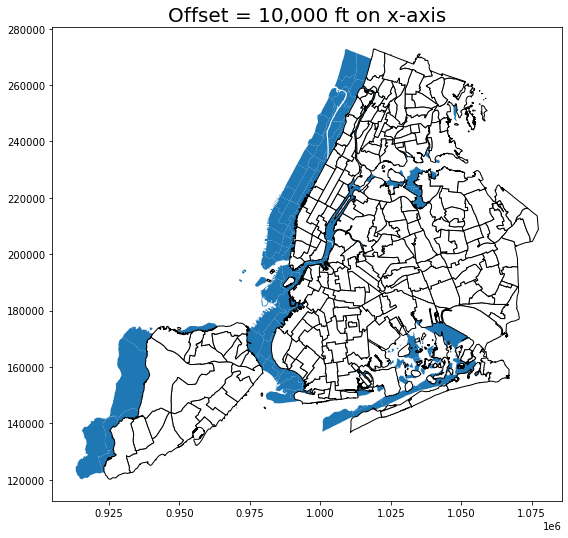

In [171]:
fig, ax = plt.subplots(figsize=(8,8)) # creating a figure

# offset the nta shapes 10,000 feet to the right along the x-axis.
nta_shape.translate(10000).plot(ax=ax, 
                                color='white', 
                                edgecolor='black')

nta_shape.plot(ax=ax, 
               zorder=0)

ax.set_title('Offset = 10,000 ft on x-axis', fontsize=20)
ax.set_aspect('equal', 'box')
fig.tight_layout()